In [1]:
from tensorflow import keras
import tensorflow as tf
from lib.utils import model, gan, build, checkpoints
import matplotlib.pyplot as plt

# Final Cifar10 models with tanh activation

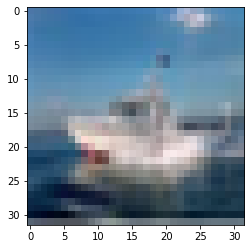

In [2]:
(x,y), (_,_) = keras.datasets.cifar10.load_data()
dataset = x[y.flatten() == 8]
plt.imshow((dataset).astype('int32')[1])
dataset = dataset.reshape((dataset.shape[0],)+ (32,32,3)) .astype('float32') /127.5 - 1.0

In [3]:
res = 32
channel = 3
# Preprocessing data with custom function
batch_size = 64
img_shape = (res,res,channel)
epochs = 500
latent_dim = 100
n_images = 16
s = tf.random.normal([n_images, latent_dim])
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
image_dir = "../../../oDig/cifar/final/tanh/"
checkpoint_dir = '../../../checkpoints/cifar_checkpoints/final/tanh/'
image_freq = 100
checkpoint_freq =100
d_optimizer = build.d_optimizer(0.0002)
g_optimizer = build.g_optimizer(0.0002)

2022-04-11 10:37:34.046402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 10:37:34.074251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 10:37:34.074645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 10:37:34.076040: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

# Ascending models

In [9]:
name = 'Model_1-Asc-Tanh-nBatch-sDrop'
model1 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen1, disc1 = model.build(model1)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen1, disc=disc1,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 1024)              103424    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 16)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 32)       8224      
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 32)        0         
                                                         

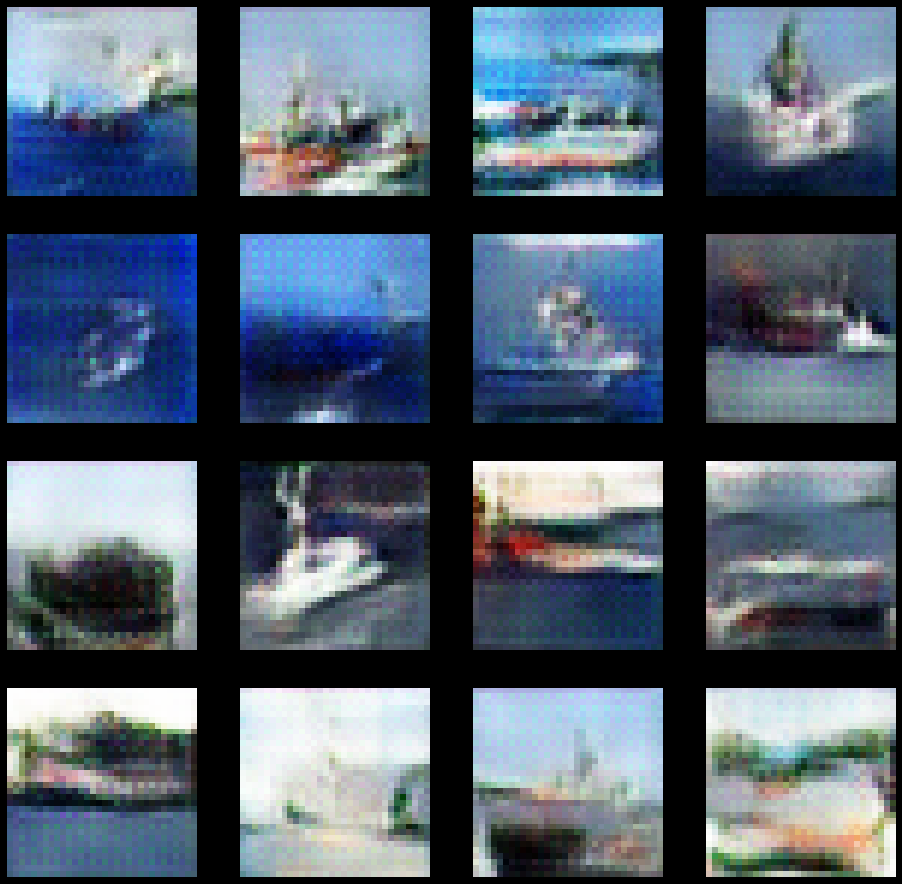

None
157/157 [==============================] - 1s 8ms/step - d_loss: 0.6916 - g_loss: 0.6516


In [10]:
g = gan.GAN(g=gen1, d=disc1, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [11]:
name = 'Model_2-Asc-Tanh-nBatch-sDrop'
model2 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen2, disc2 = model.build(model2)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen2, disc=disc2,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 2048)              206848    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 2048)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 64)       32832     
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                         

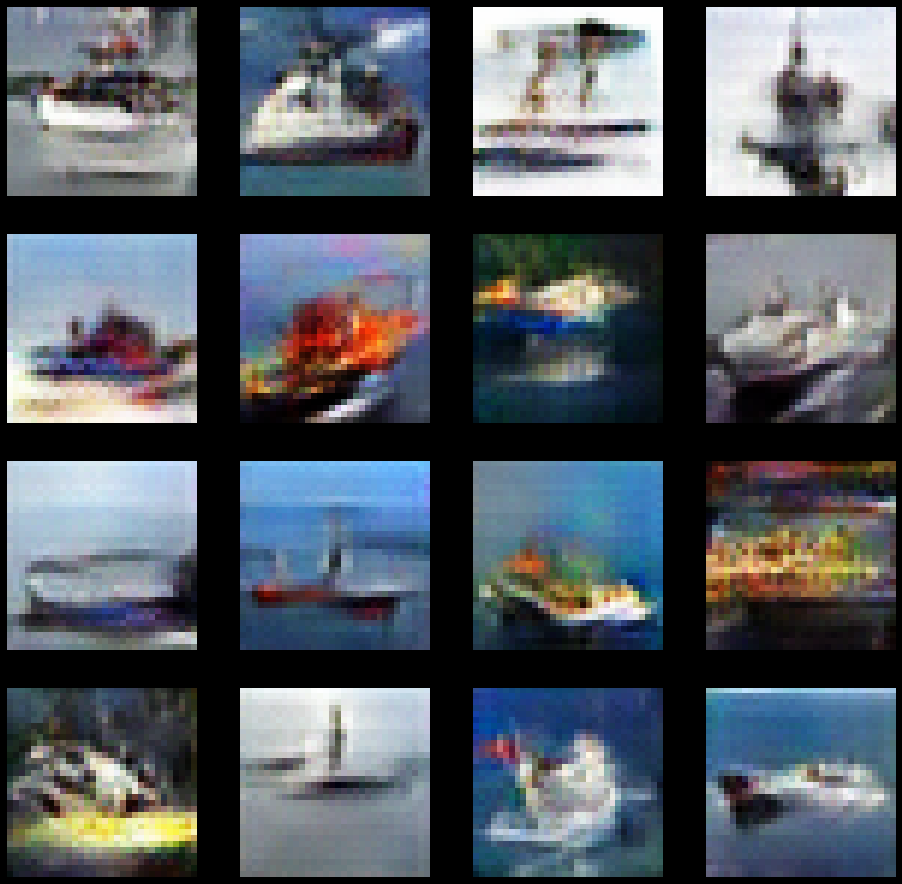

None
157/157 [==============================] - 2s 12ms/step - d_loss: 0.6924 - g_loss: 0.6508


In [12]:
g = gan.GAN(g=gen2, d=disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [13]:
name = 'Model_3-Asc-Tanh-nBatch-sDrop'
model3 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen3, disc3 = model.build(model3)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen3, disc=disc3,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

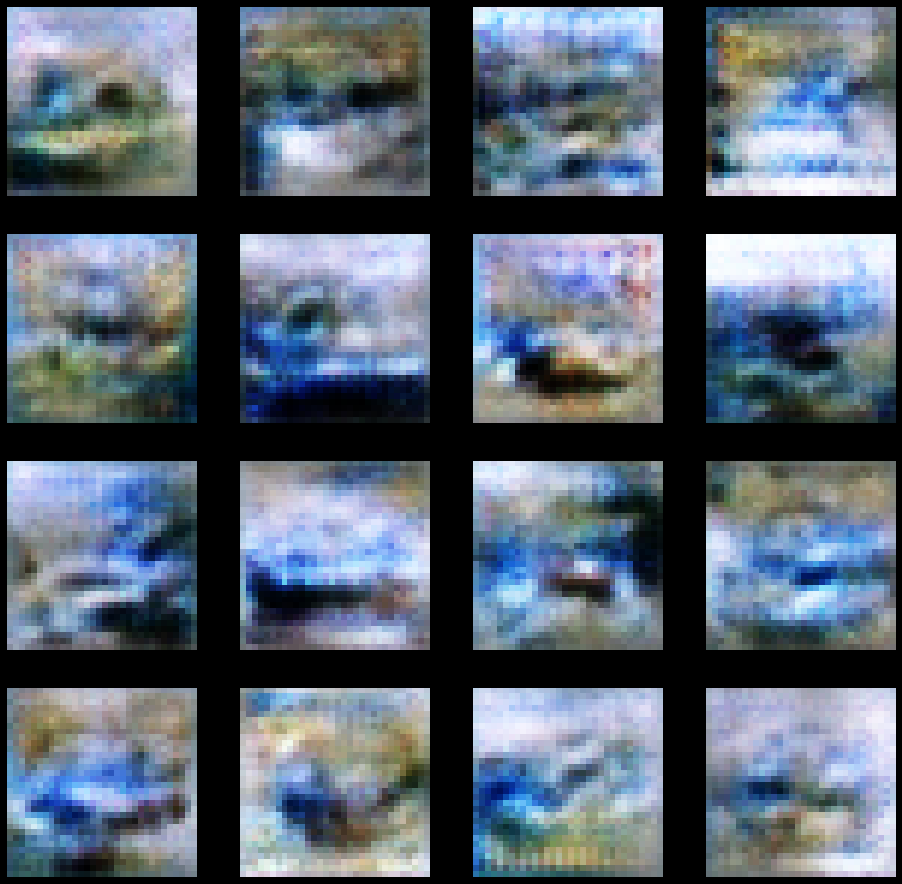

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6922 - g_loss: 0.6454


In [14]:
g = gan.GAN(g=gen3, d=disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [15]:
name = 'Model_4-Asc-Tanh-nBatch-sDrop'
model4 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen4, disc4 = model.build(model4)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen4, disc=disc4,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

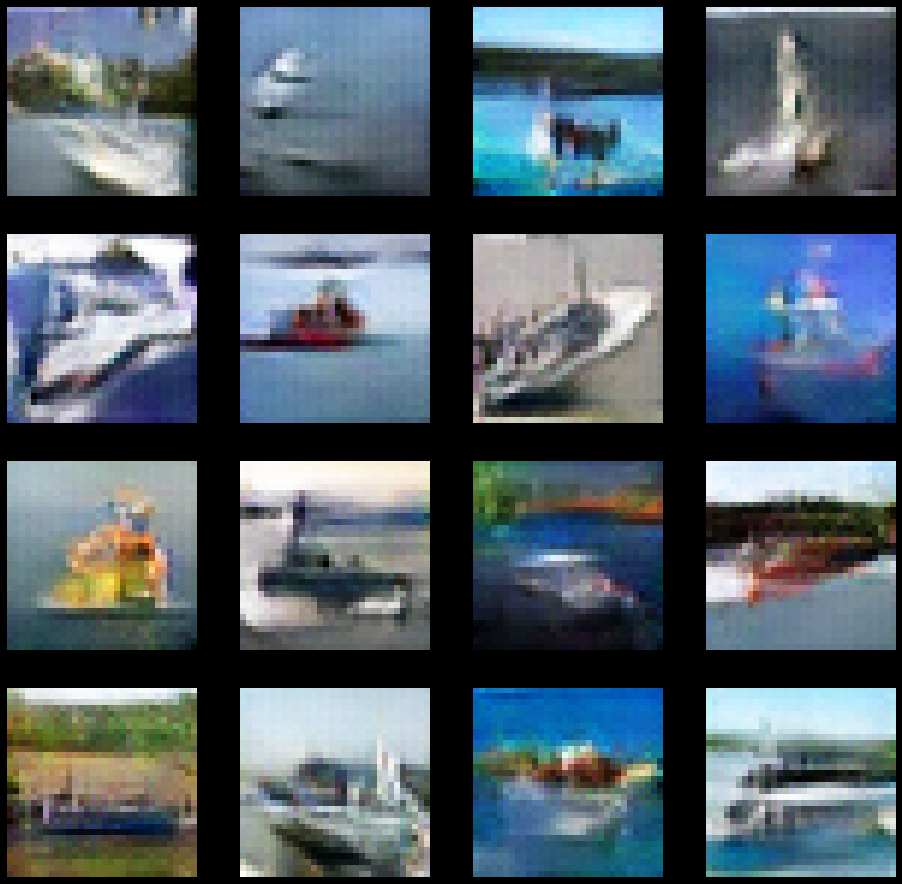

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6866 - g_loss: 0.6741


In [16]:
g = gan.GAN(g=gen4, d=disc4, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [17]:
name = 'Model_5-Asc-Tanh-nBatch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen5, disc5 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen5, disc=disc5,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

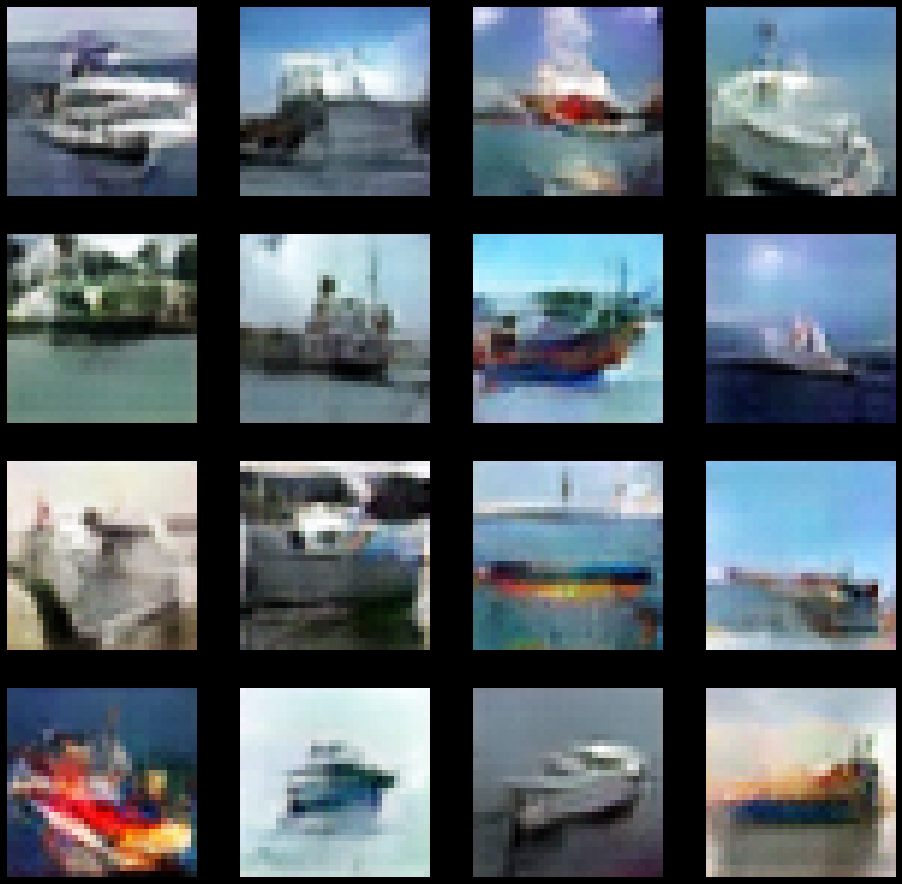

None
157/157 [==============================] - 4s 28ms/step - d_loss: 0.4988 - g_loss: 1.1455


In [18]:
g = gan.GAN(g=gen5, d=disc5, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [19]:
name = 'Model_7-Asc-Tanh-nBatch-mDrop'
model7 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen6, disc6 = model.build(model7)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen6, disc=disc6,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 2048)              206848    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 2048)              0         
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 16, 16, 64)       32832     
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

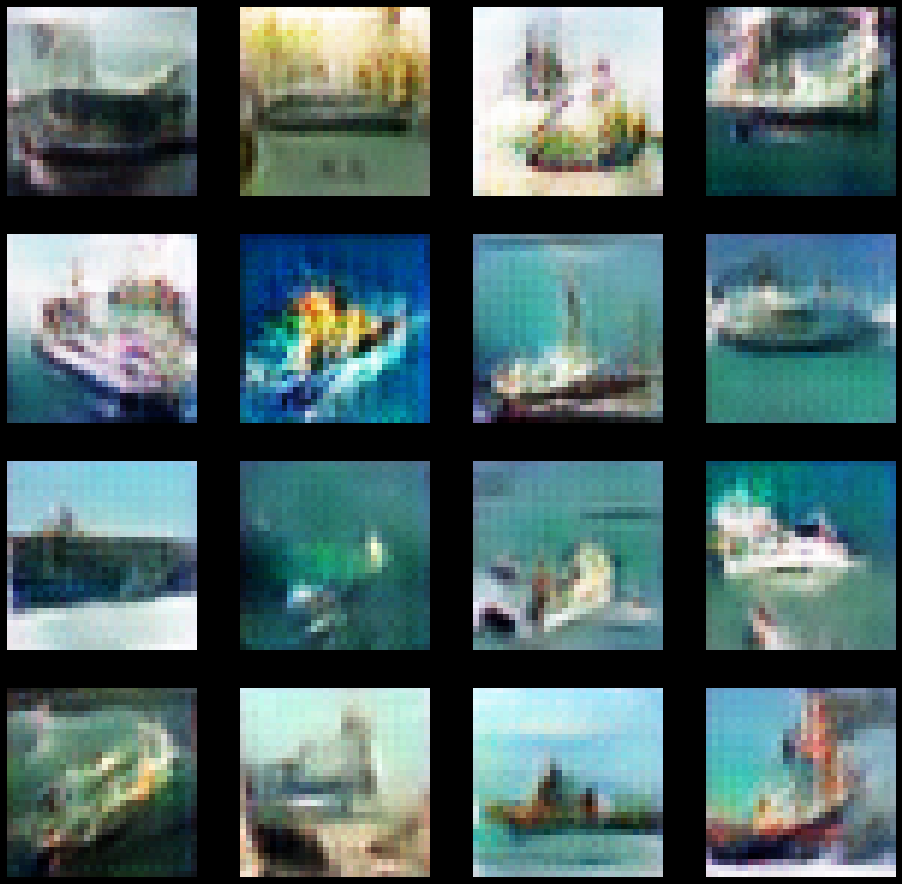

None
157/157 [==============================] - 2s 12ms/step - d_loss: 0.6923 - g_loss: 0.6507


In [20]:
g = gan.GAN(g=gen6, d=disc6, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [21]:
name = 'Model_9-Asc-Tanh-nBatch-mDrop'
model9 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen7, disc7 = model.build(model9)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen7, disc=disc7,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_6 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

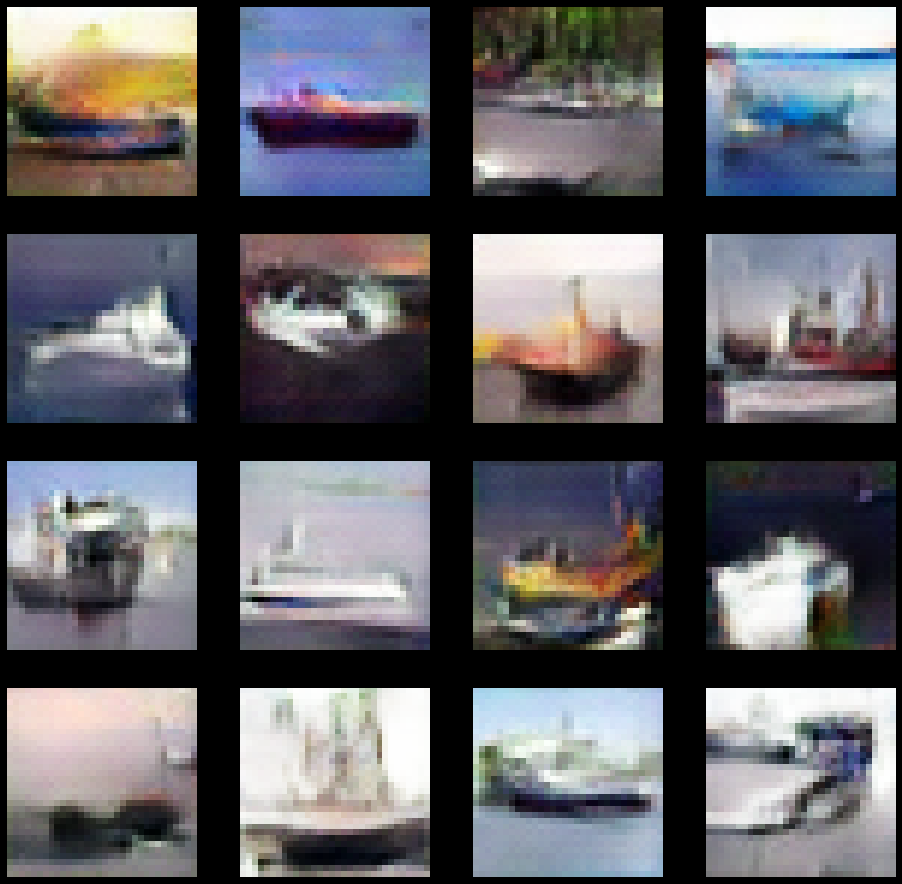

None
157/157 [==============================] - 4s 23ms/step - d_loss: 0.6849 - g_loss: 0.6777


In [22]:
g = gan.GAN(g=gen7, d=disc7, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [23]:
name = 'Model_10-Asc-Tanh-nBatch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen8, disc8 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen8, disc=disc8,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_7 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

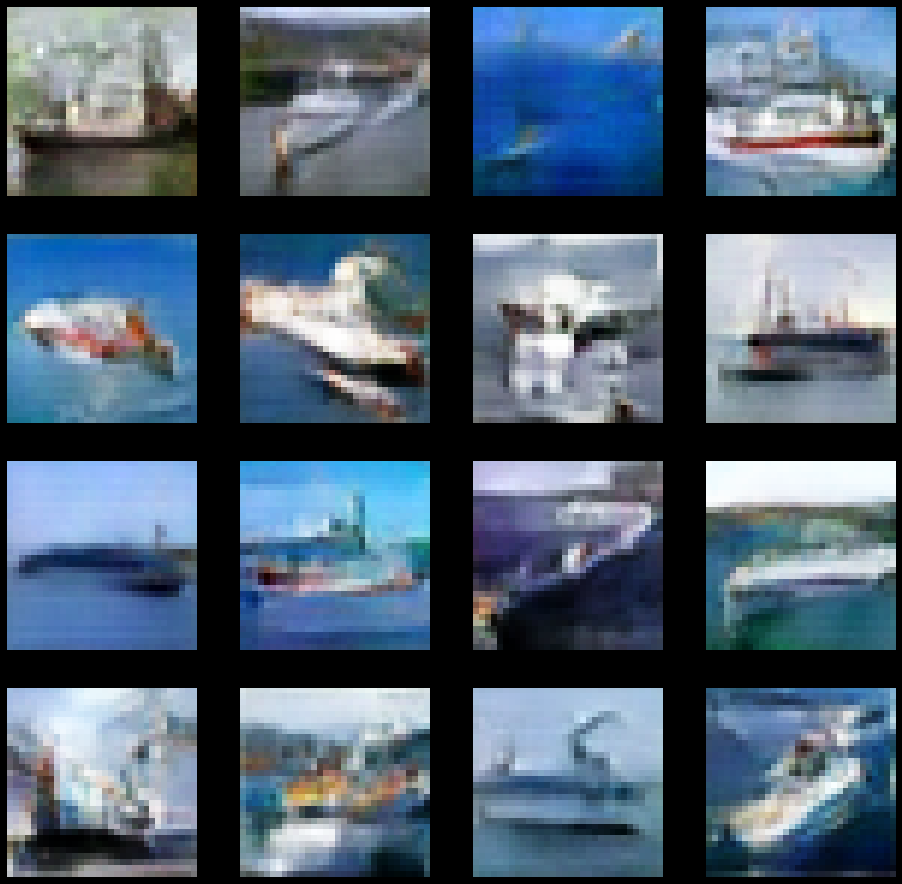

None
157/157 [==============================] - 4s 28ms/step - d_loss: 0.4761 - g_loss: 1.2040


In [24]:
g = gan.GAN(g=gen8, d=disc8, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [25]:
name = 'Model_12-Asc-Tanh-Batch-sDrop'
model2 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen9, disc9 = model.build(model2)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen9, disc=disc9,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 2048)              206848    
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 2048)              0         
                                                                 
 reshape_8 (Reshape)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 16, 16, 64)       32832     
 Transpose)                                                      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

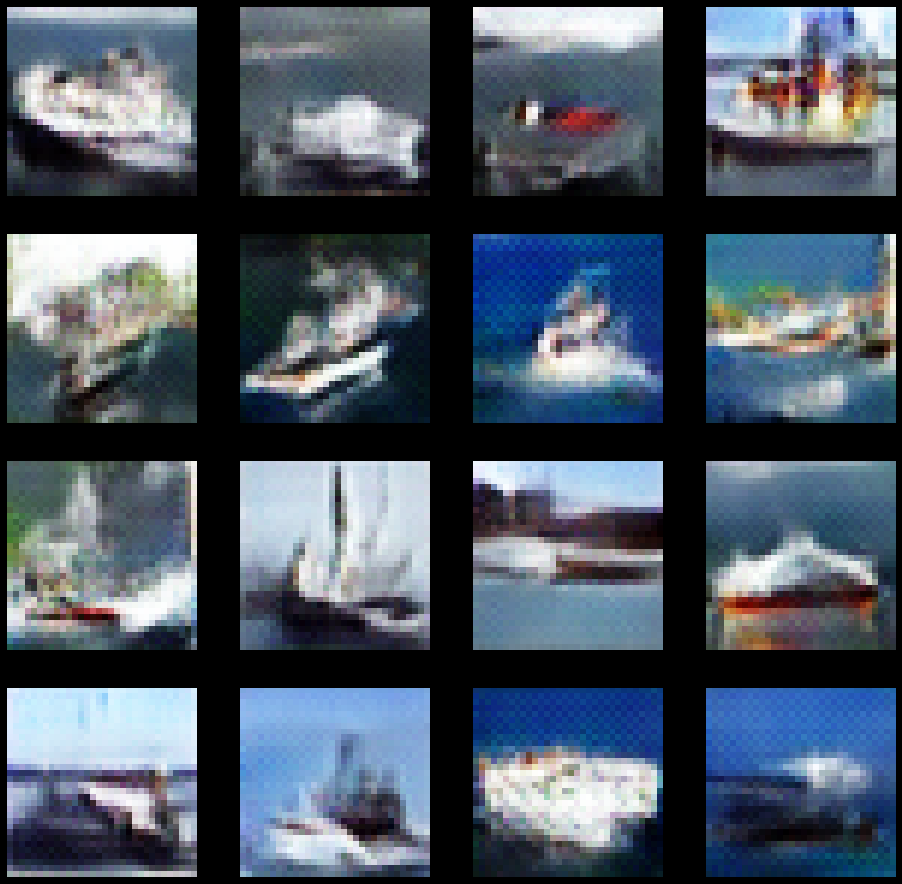

None
157/157 [==============================] - 2s 13ms/step - d_loss: 0.6917 - g_loss: 0.6515


In [26]:
g = gan.GAN(g=gen9, d=disc9, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [27]:
name = 'Model_14-Asc-Tanh-Batch-sDrop'
model4 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen10, disc10 = model.build(model4)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen10, disc=disc10,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_18 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_9 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

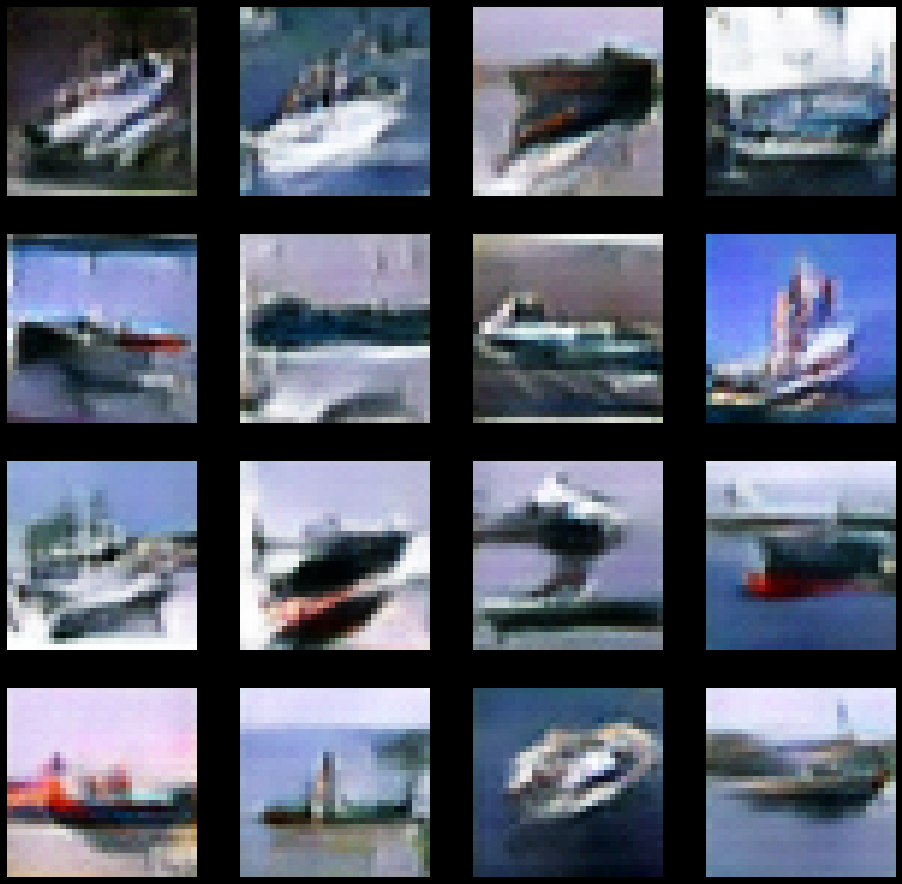

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6844 - g_loss: 0.6718


In [28]:
g = gan.GAN(g=gen10, d=disc10, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [29]:
name = 'Model_15-Asc-Tanh-Batch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen11, disc11 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen11, disc=disc11,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_20 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_10 (Reshape)        (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

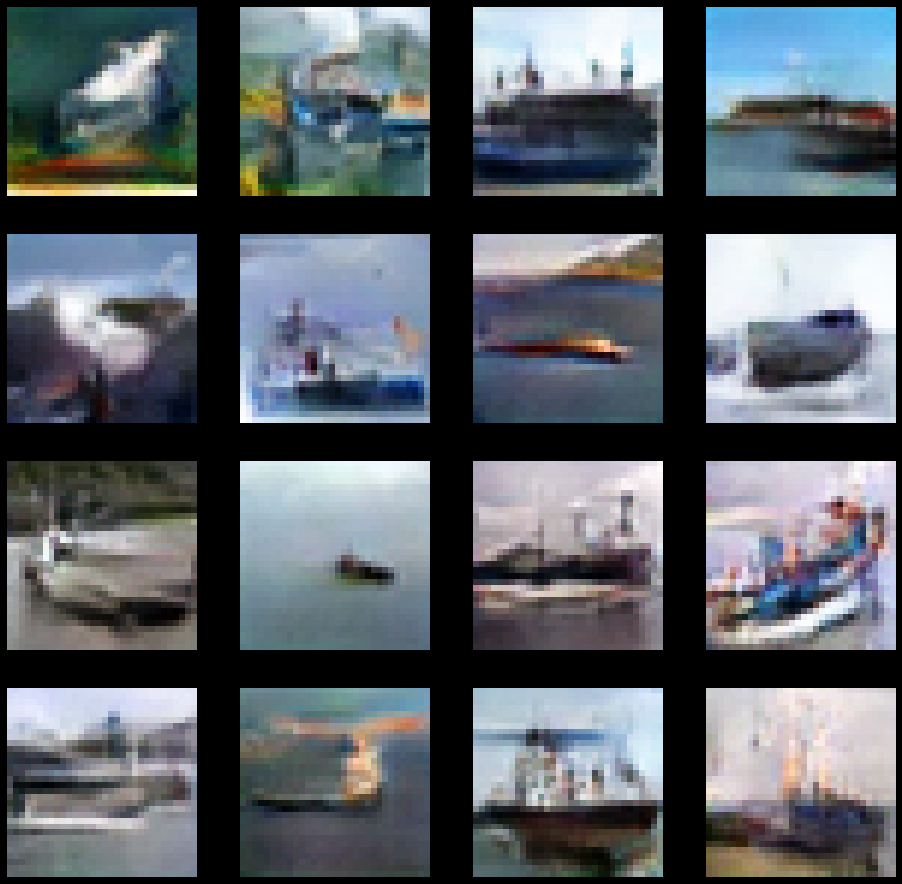

None
157/157 [==============================] - 5s 32ms/step - d_loss: 0.4592 - g_loss: 1.2830


In [30]:
g = gan.GAN(g=gen11, d=disc11, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [31]:
name = 'Model_17-Asc-Tanh-Batch-mDrop'
model7 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen12, disc12 = model.build(model7)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen12, disc=disc12,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_22 (Dense)            (None, 2048)              206848    
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 2048)              0         
                                                                 
 reshape_11 (Reshape)        (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 16, 16, 64)       32832     
 Transpose)                                                      
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

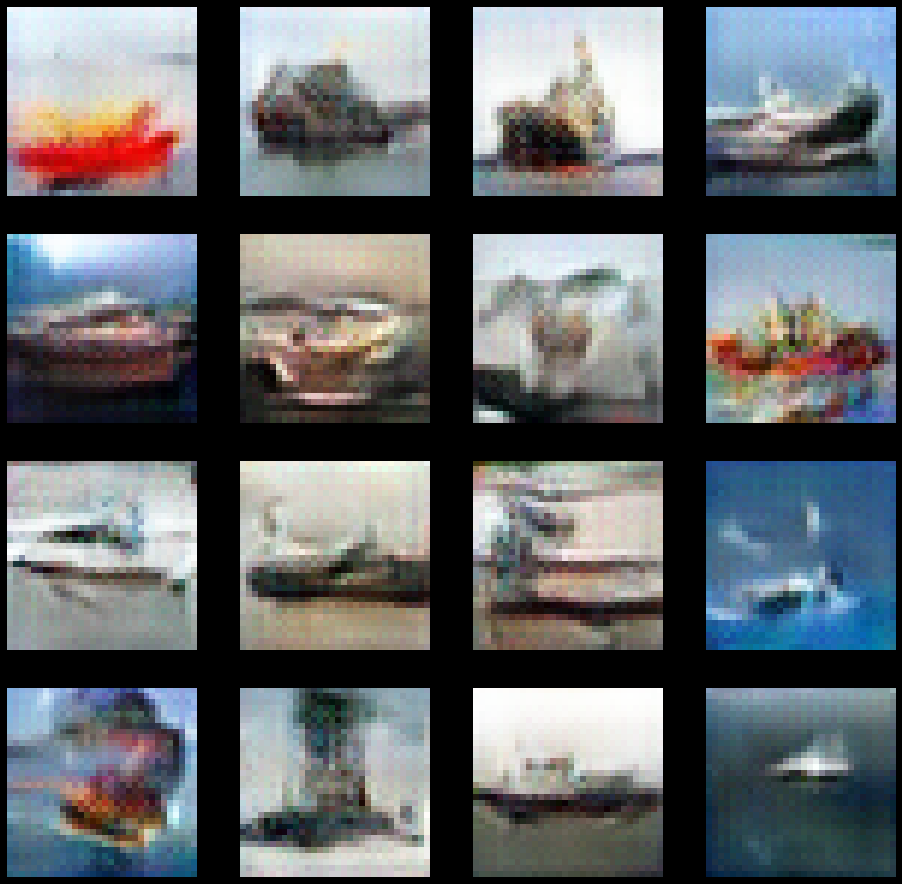

None
157/157 [==============================] - 2s 13ms/step - d_loss: 0.6925 - g_loss: 0.6518


In [32]:
g = gan.GAN(g=gen12, d=disc12, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [33]:
name = 'Model_19-Asc-Tanh-Batch-mDrop'
model9 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen13, disc13 = model.build(model9)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen13, disc=disc13,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_24 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_12 (Reshape)        (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

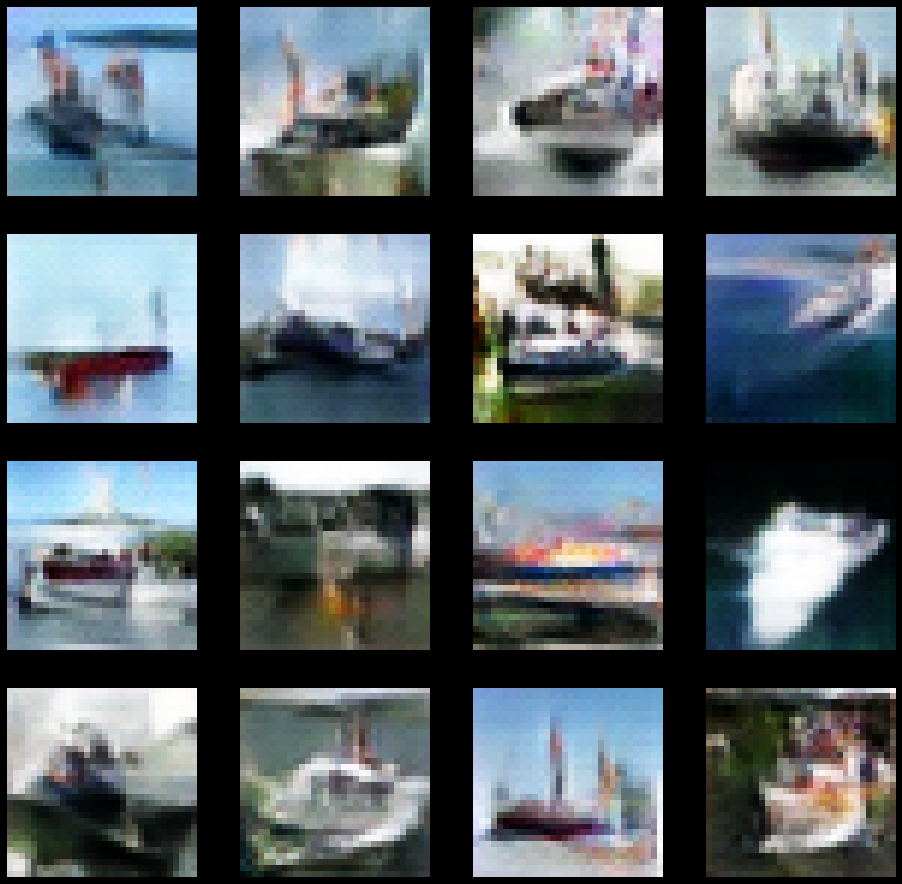

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6875 - g_loss: 0.6712


In [34]:
g = gan.GAN(g=gen13, d=disc13, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [35]:
name = 'Model_20-Asc-Tanh-Batch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen14, disc14 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen14, disc=disc14,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_26 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_67 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_13 (Reshape)        (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_39 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_65 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

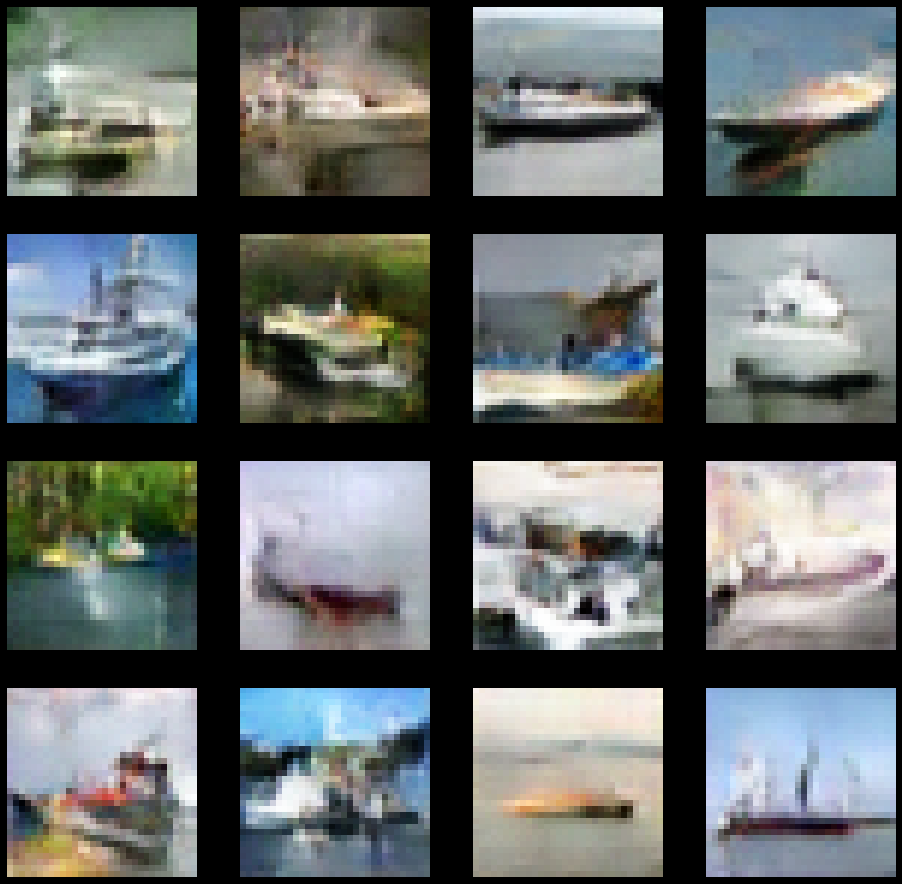

None
157/157 [==============================] - 5s 32ms/step - d_loss: 0.4362 - g_loss: 1.3872


In [36]:
g = gan.GAN(g=gen14, d=disc14, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

# Descending models

In [37]:
name = 'Model_1-Desc-Tanh-nBatch-sDrop'
model1 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen15, disc15 = model.build(model1)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen15, disc=disc15,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_28 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_14 (Reshape)        (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_42 (Conv2D  (None, 16, 16, 32)       32800     
 Transpose)                                                      
                                                                 
 leaky_re_lu_70 (LeakyReLU)  (None, 16, 16, 32)        0         
                                                         

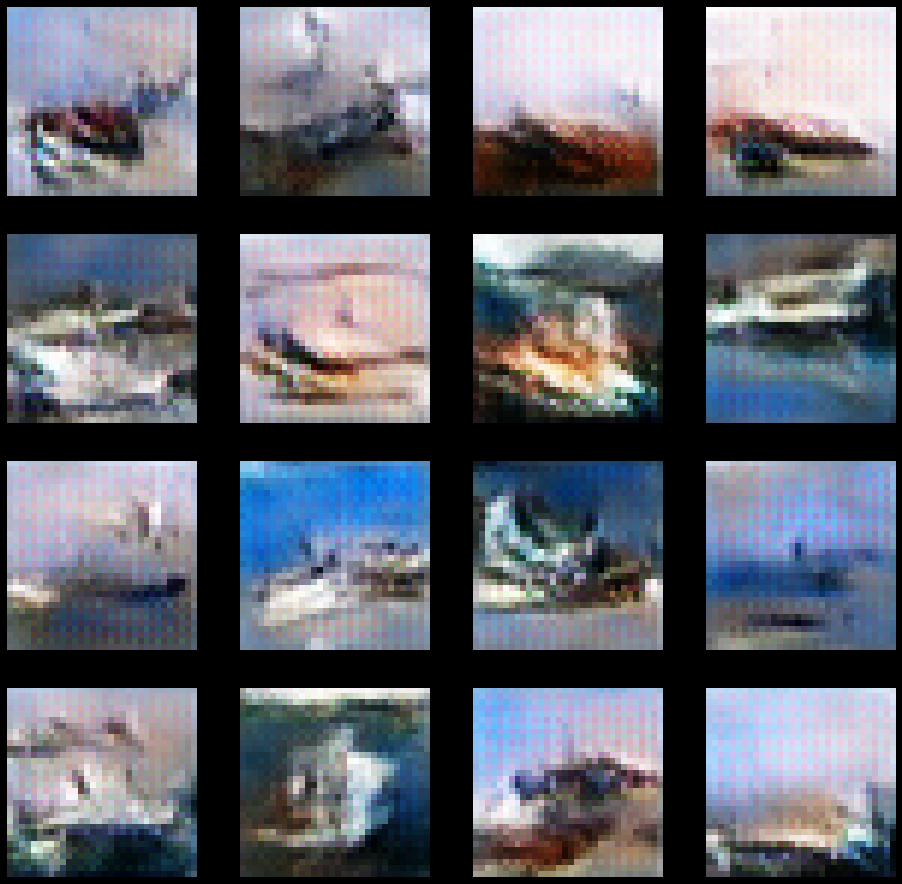

None
157/157 [==============================] - 1s 10ms/step - d_loss: 0.6931 - g_loss: 0.6481


In [38]:
g = gan.GAN(g=gen15, d=disc15, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [4]:
name = 'Model_2-Desc-Tanh-nBatch-sDrop'
model2 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen16, disc16 = model.build(model2)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen16, disc=disc16,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 8192)              827392    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 64)       131136    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                         

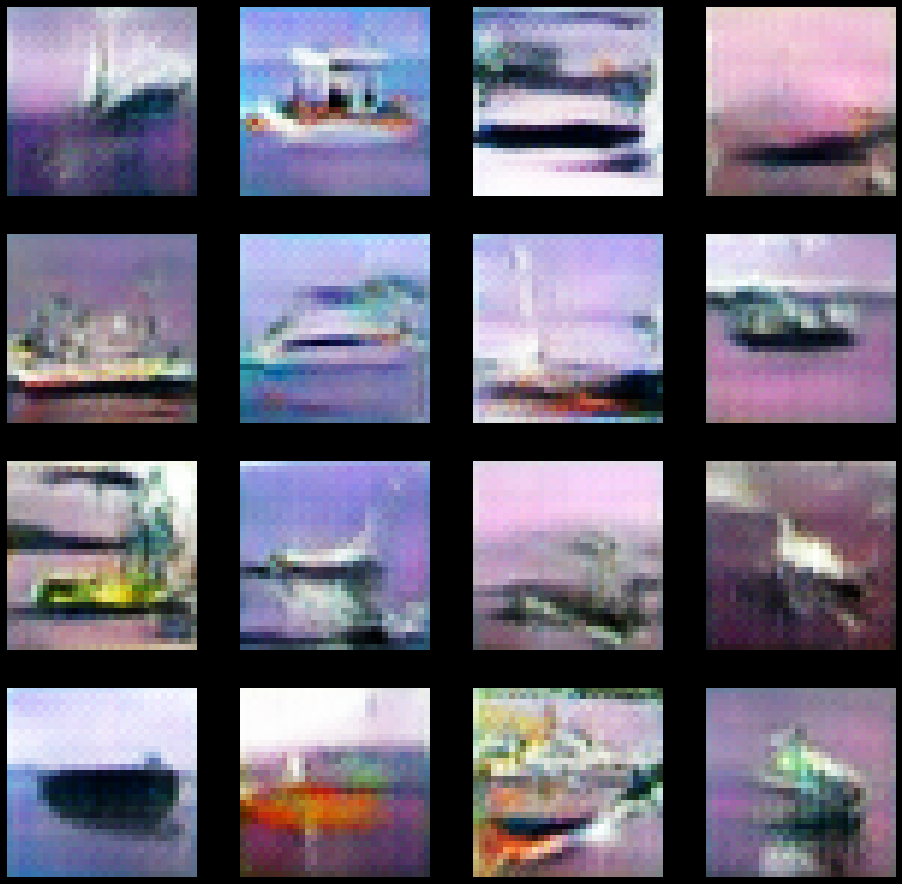

None
157/157 [==============================] - 1s 9ms/step - d_loss: 0.6945 - g_loss: 0.6658


In [5]:
g = gan.GAN(g=gen16, d=disc16, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [6]:
name = 'Model_3-Desc-Tanh-nBatch-sDrop'
model3 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen17, disc17 = model.build(model3)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen17, disc=disc17,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16384)             0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                         

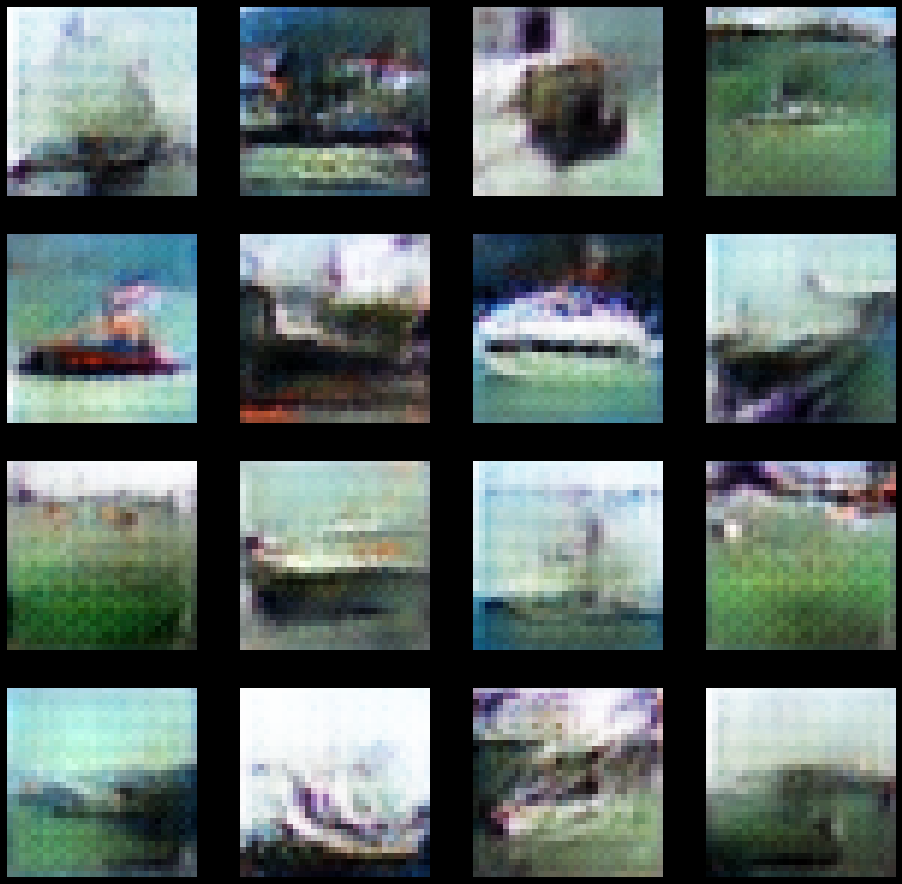

None
157/157 [==============================] - 3s 16ms/step - d_loss: 0.6931 - g_loss: 0.6457


In [7]:
g = gan.GAN(g=gen17, d=disc17, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [8]:
name = 'Model_4-Desc-Tanh-nBatch-sDrop'
model4 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen18, disc18 = model.build(model4)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen18, disc=disc18,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

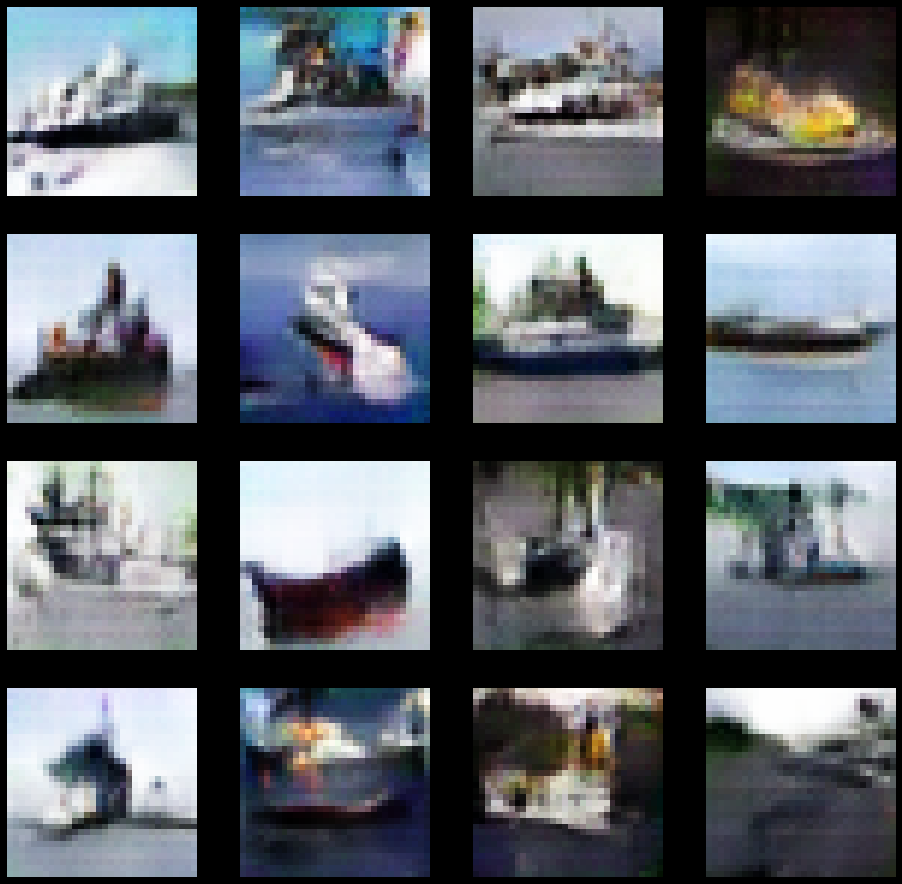

None
157/157 [==============================] - 3s 17ms/step - d_loss: 0.6877 - g_loss: 0.6712


In [9]:
g = gan.GAN(g=gen18, d=disc18, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [10]:
name = 'Model_5-Desc-Tanh-nBatch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen19, disc19 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen19, disc=disc19,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

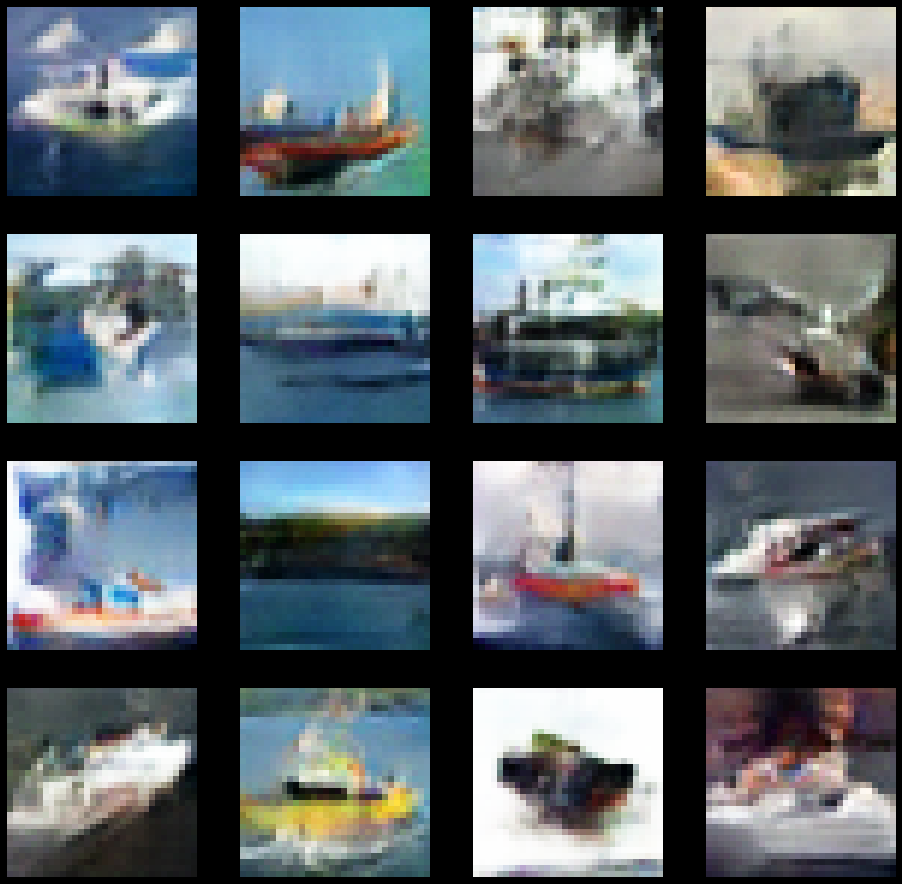

None
157/157 [==============================] - 3s 22ms/step - d_loss: 0.5686 - g_loss: 0.9855


In [11]:
g = gan.GAN(g=gen19, d=disc19, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [12]:
name = 'Model_6-Desc-Tanh-nBatch-mDrop'
model6 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen20, disc20 = model.build(model6)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen20, disc=disc20,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 16, 16, 32)       32800     
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 32)        0         
                                                         

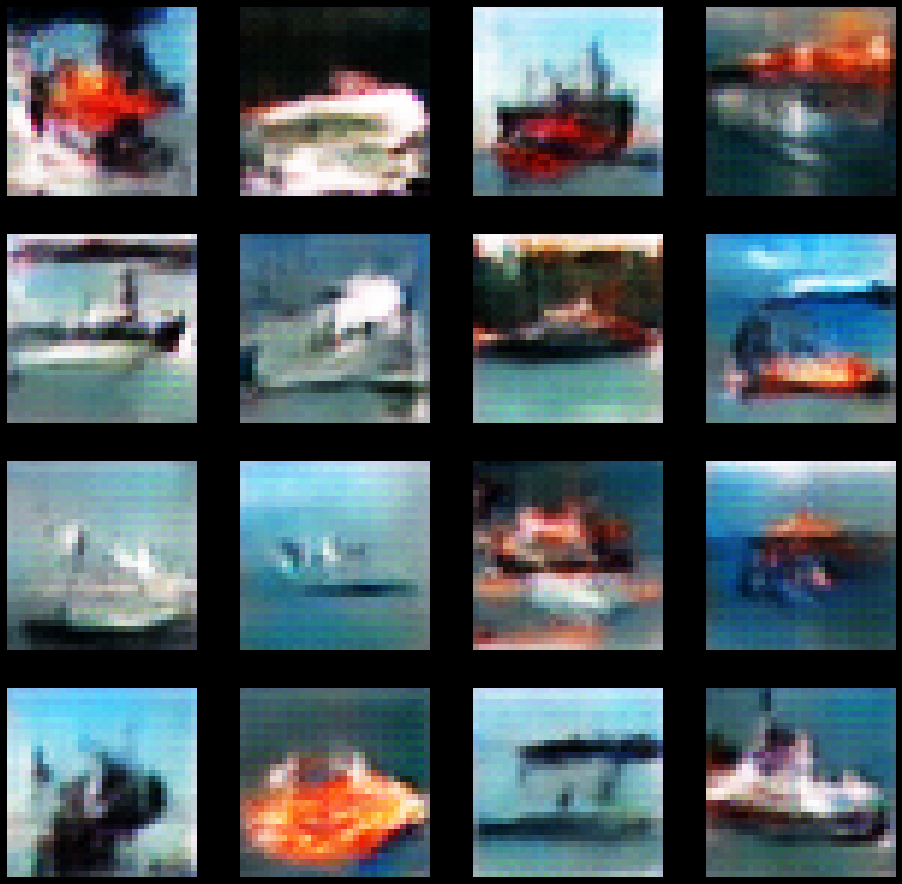

None
157/157 [==============================] - 1s 8ms/step - d_loss: 0.6926 - g_loss: 0.6530


In [13]:
g = gan.GAN(g=gen20, d=disc20, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [14]:
name = 'Model_7-Desc-Tanh-nBatch-mDrop'
model7 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen21, disc21 = model.build(model7)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen21, disc=disc21,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 16, 16, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

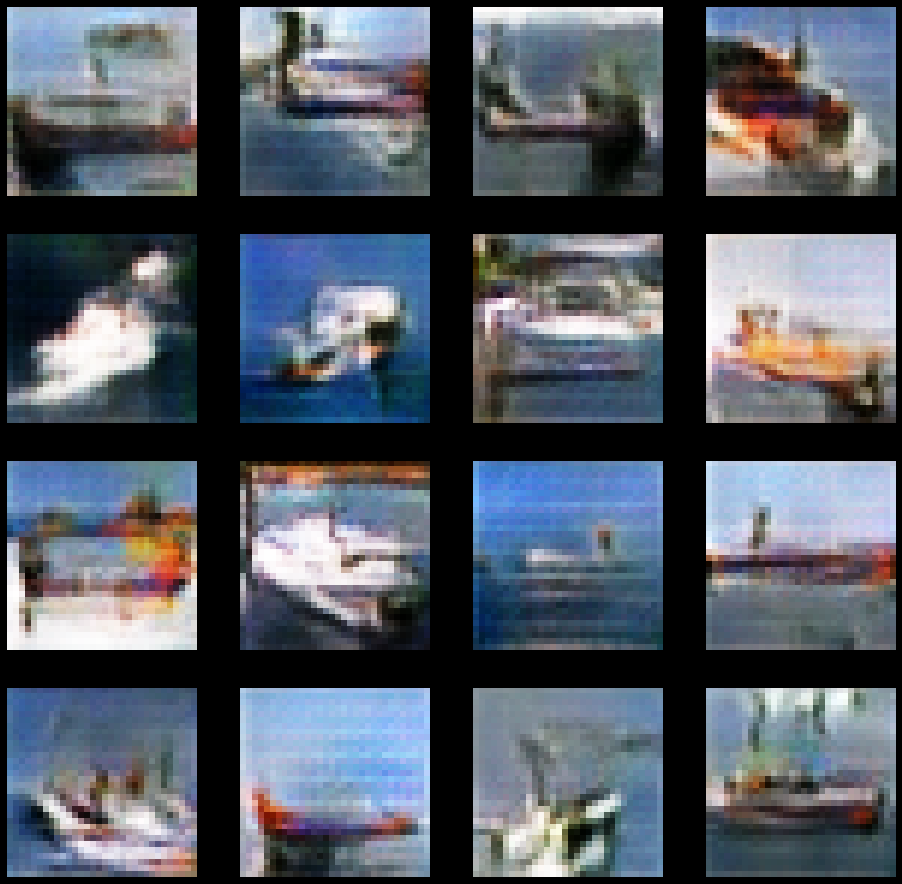

None
157/157 [==============================] - 1s 10ms/step - d_loss: 0.6918 - g_loss: 0.6496


In [15]:
g = gan.GAN(g=gen21, d=disc21, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [16]:
name = 'Model_9-Desc-Tanh-nBatch-mDrop'
model9 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen22, disc22 = model.build(model9)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen22, disc=disc22,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_6 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

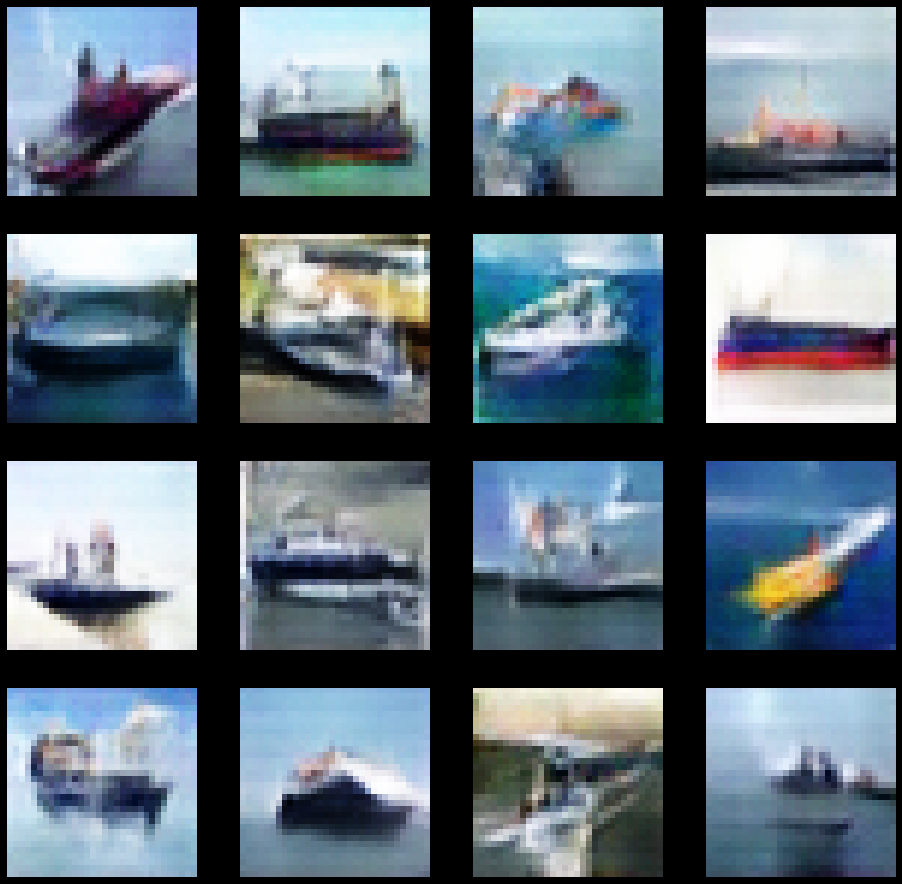

None
157/157 [==============================] - 3s 16ms/step - d_loss: 0.6853 - g_loss: 0.6756


In [17]:
g = gan.GAN(g=gen22, d=disc22, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [18]:
name = 'Model_10-Desc-Tanh-nBatch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen23, disc23 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen23, disc=disc23,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_7 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

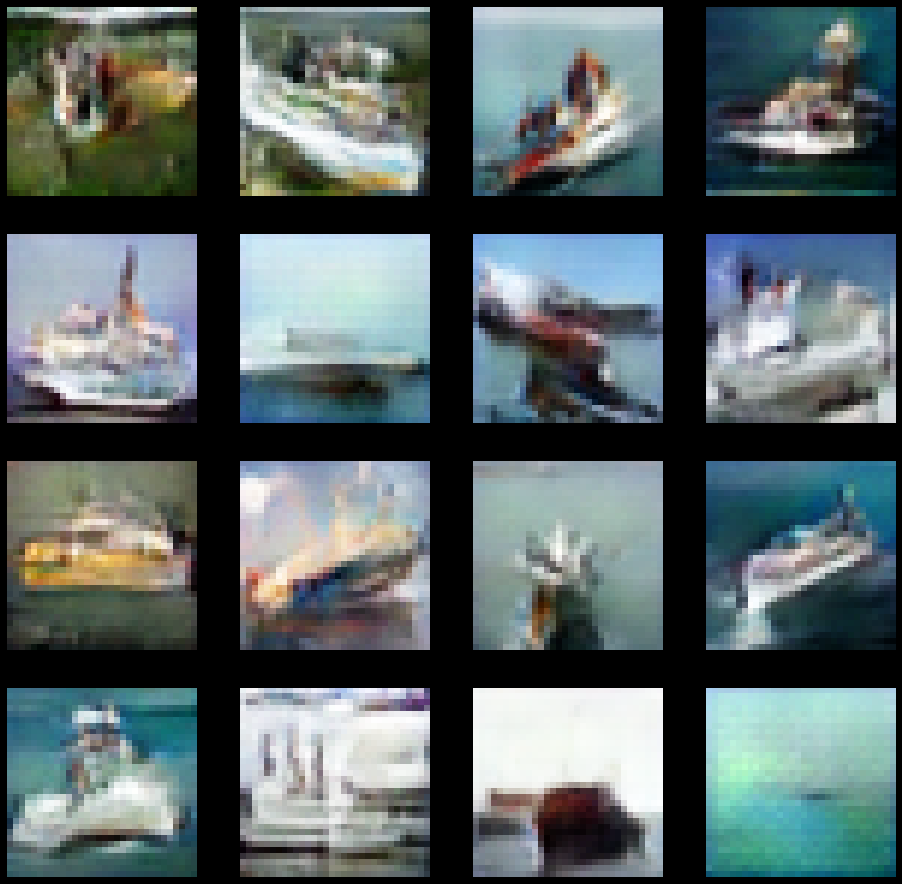

None
157/157 [==============================] - 3s 22ms/step - d_loss: 0.5550 - g_loss: 0.9864


In [19]:
g = gan.GAN(g=gen23, d=disc23, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [4]:
name = 'Model_12-Desc-Tanh-Batch-sDrop'
model2 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen24, disc24 = model.build(model2)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen24, disc=disc24,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 8192)              827392    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 64)       131136    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                         

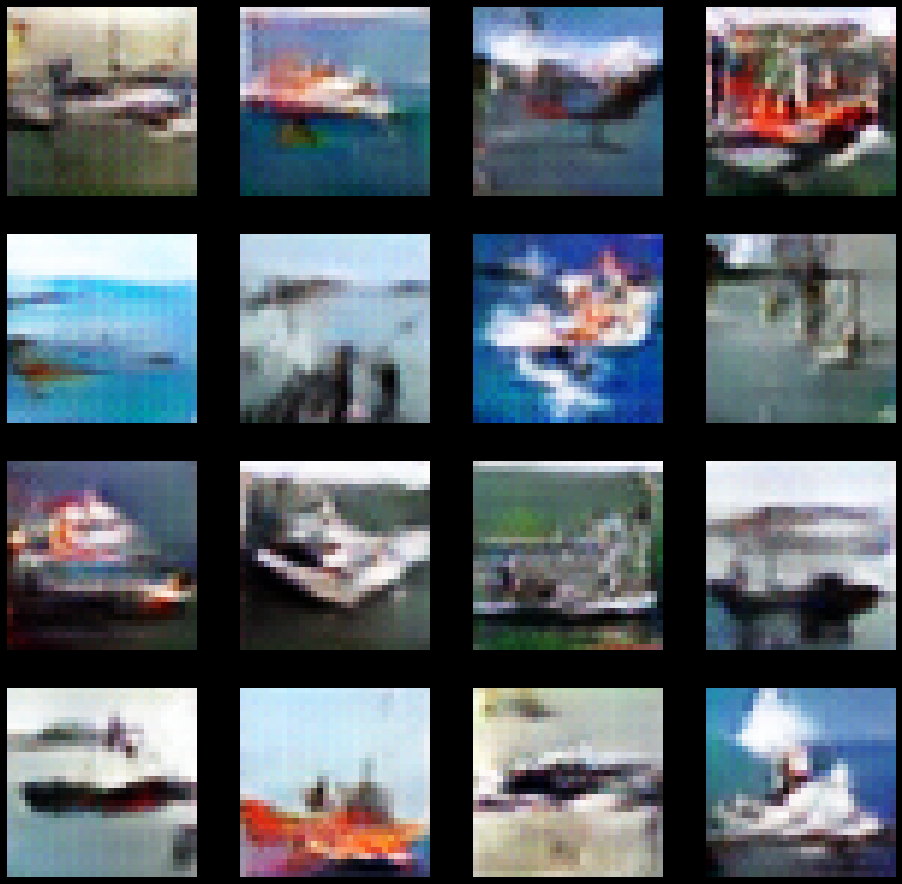

None
157/157 [==============================] - 2s 10ms/step - d_loss: 0.6921 - g_loss: 0.6475


In [5]:
g = gan.GAN(g=gen24, d=disc24, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [6]:
name = 'Model_14-Desc-Tanh-Batch-sDrop'
model4 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen25, disc25 = model.build(model4)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen25, disc=disc25,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16384)             0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                         

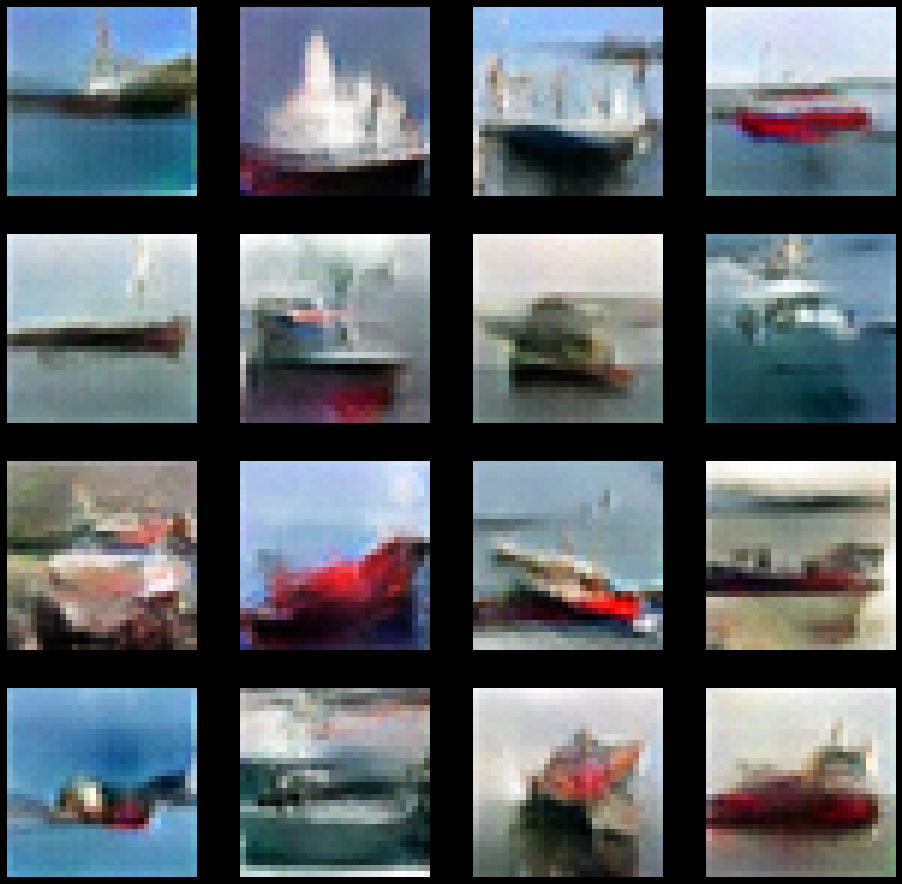

None
157/157 [==============================] - 3s 18ms/step - d_loss: 0.6886 - g_loss: 0.6638


In [7]:
g = gan.GAN(g=gen25, d=disc25, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [8]:
name = 'Model_15-Desc-Tanh-Batch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen26, disc26 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen26, disc=disc26,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

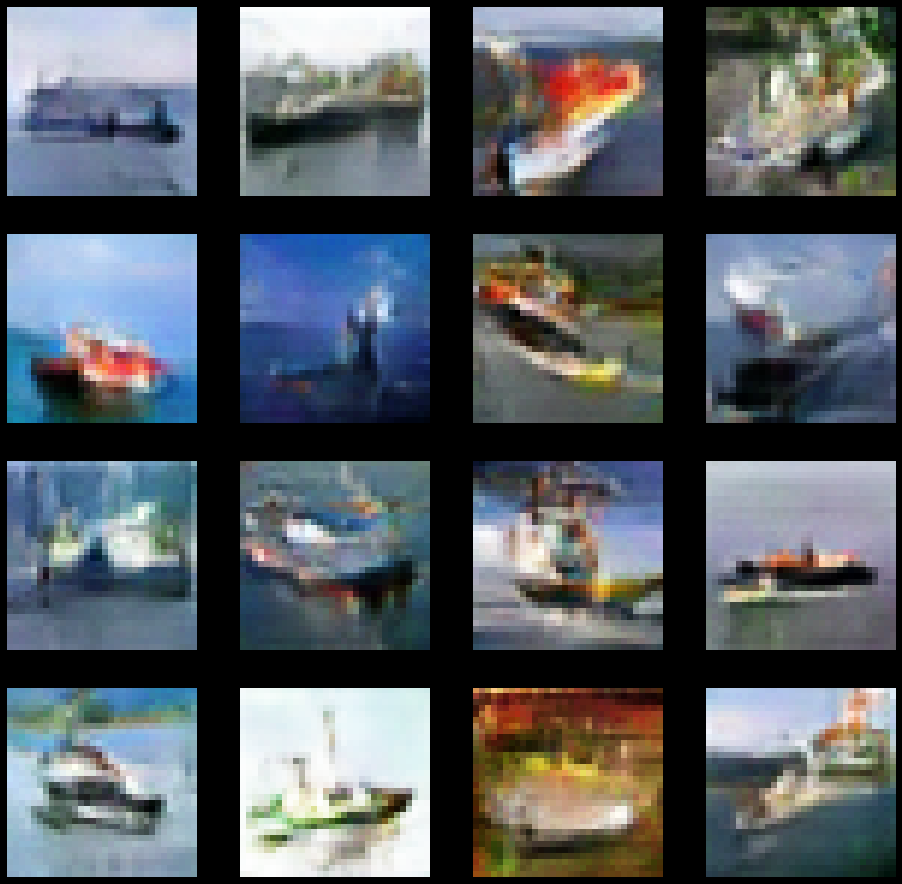

None
157/157 [==============================] - 4s 23ms/step - d_loss: 0.5121 - g_loss: 1.1292


In [9]:
g = gan.GAN(g=gen26, d=disc26, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [10]:
name = 'Model_16-Desc-Tanh-Batch-mDrop'
model6 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen27, disc27 = model.build(model6)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen27, disc=disc27,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 32)       32800     
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 32)        0         
                                                         

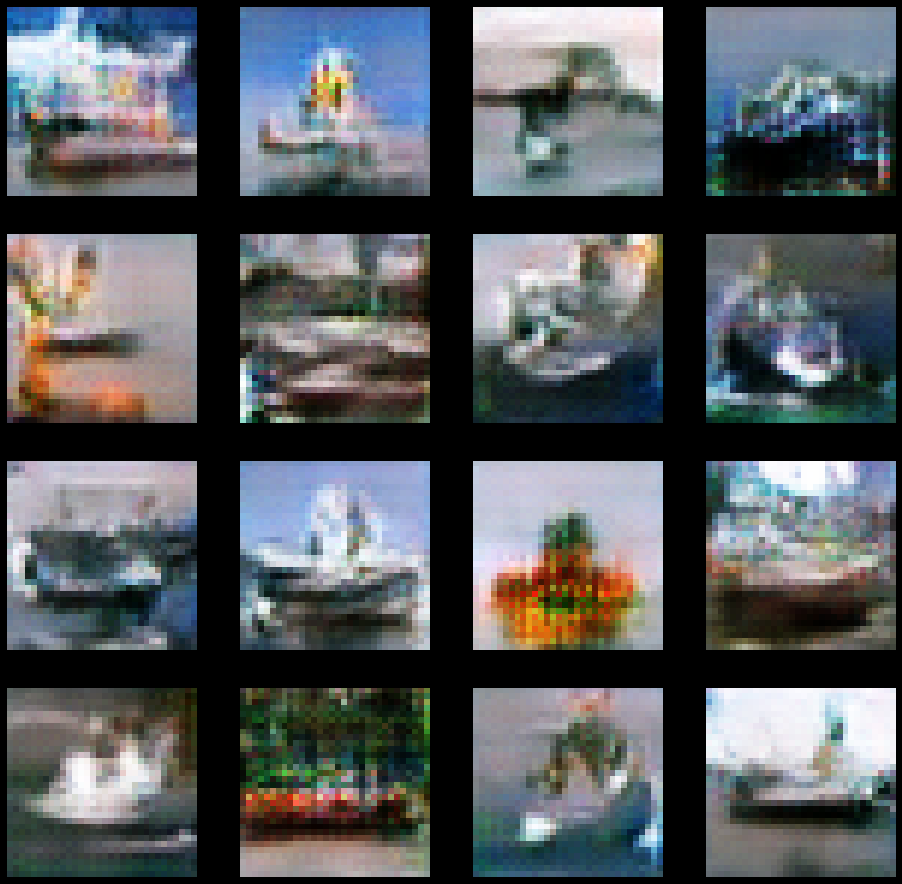

None
157/157 [==============================] - 2s 10ms/step - d_loss: 0.6925 - g_loss: 0.6470


In [11]:
g = gan.GAN(g=gen27, d=disc27, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [12]:
name = 'Model_17-Desc-Tanh-Batch-mDrop'
model7 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen28, disc28 = model.build(model7)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen28, disc=disc28,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 16, 16, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

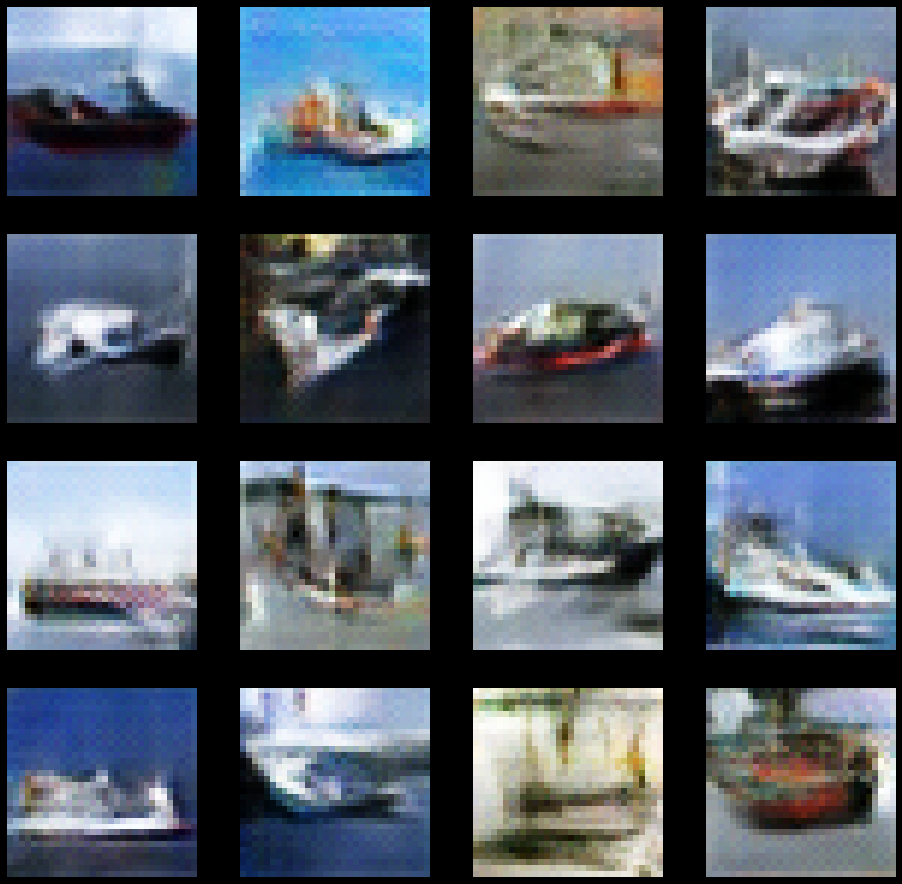

None
157/157 [==============================] - 2s 11ms/step - d_loss: 0.6921 - g_loss: 0.6496


In [13]:
g = gan.GAN(g=gen28, d=disc28, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [14]:
name = 'Model_19-Desc-Tanh-Batch-mDrop'
model9 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen29, disc29 = model.build(model9)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen29, disc=disc29,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

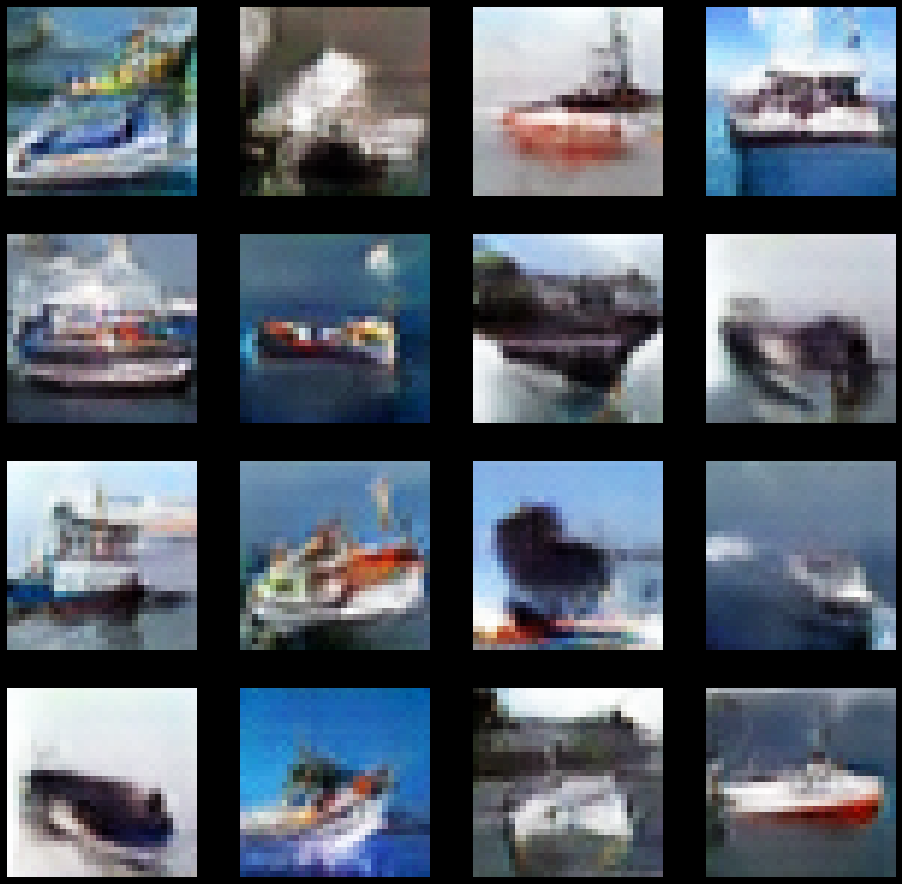

None
157/157 [==============================] - 3s 17ms/step - d_loss: 0.6868 - g_loss: 0.6656


In [15]:
g = gan.GAN(g=gen29, d=disc29, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [16]:
name = 'Model_20-Desc-Tanh-Batch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen30, disc30 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen30, disc=disc30,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_6 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

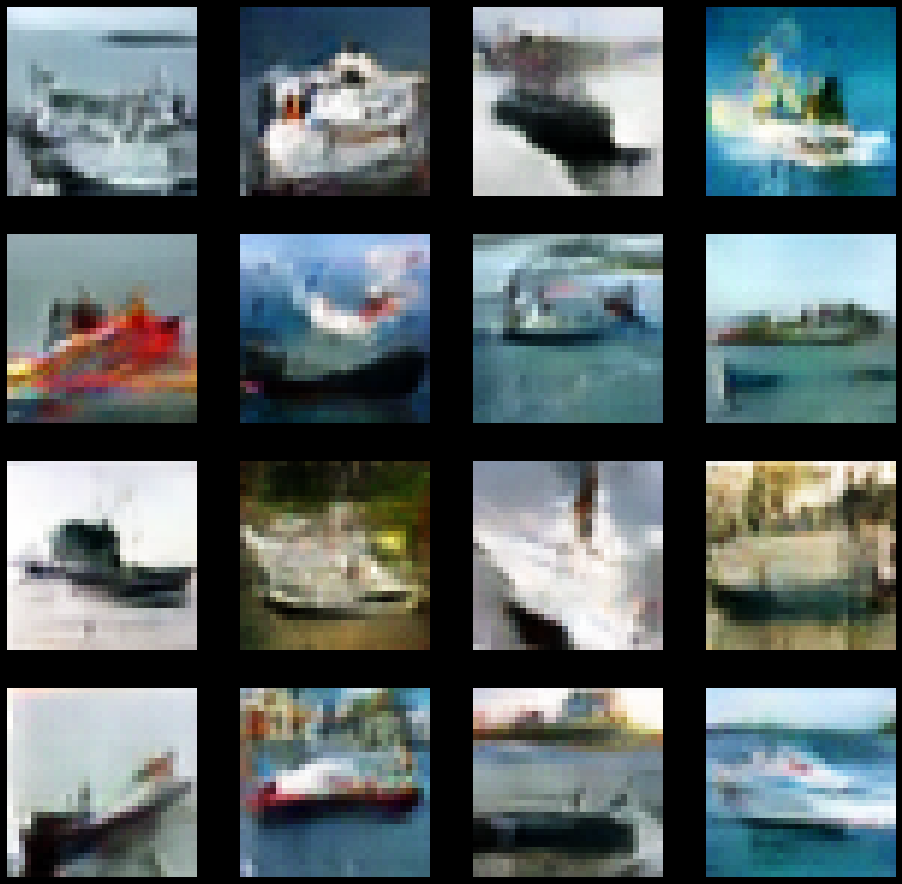

None
157/157 [==============================] - 4s 23ms/step - d_loss: 0.5302 - g_loss: 1.0957


In [17]:
g = gan.GAN(g=gen30, d=disc30, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

# Same models

In [18]:
name = 'Model_1-Same-Tanh-nBatch-sDrop'
model1 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen31, disc31 = model.build(model1)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen31, disc=disc31,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 2048)              206848    
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 2048)              0         
                                                                 
 reshape_7 (Reshape)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 16, 16, 32)       16416     
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 16, 16, 32)        0         
                                                         

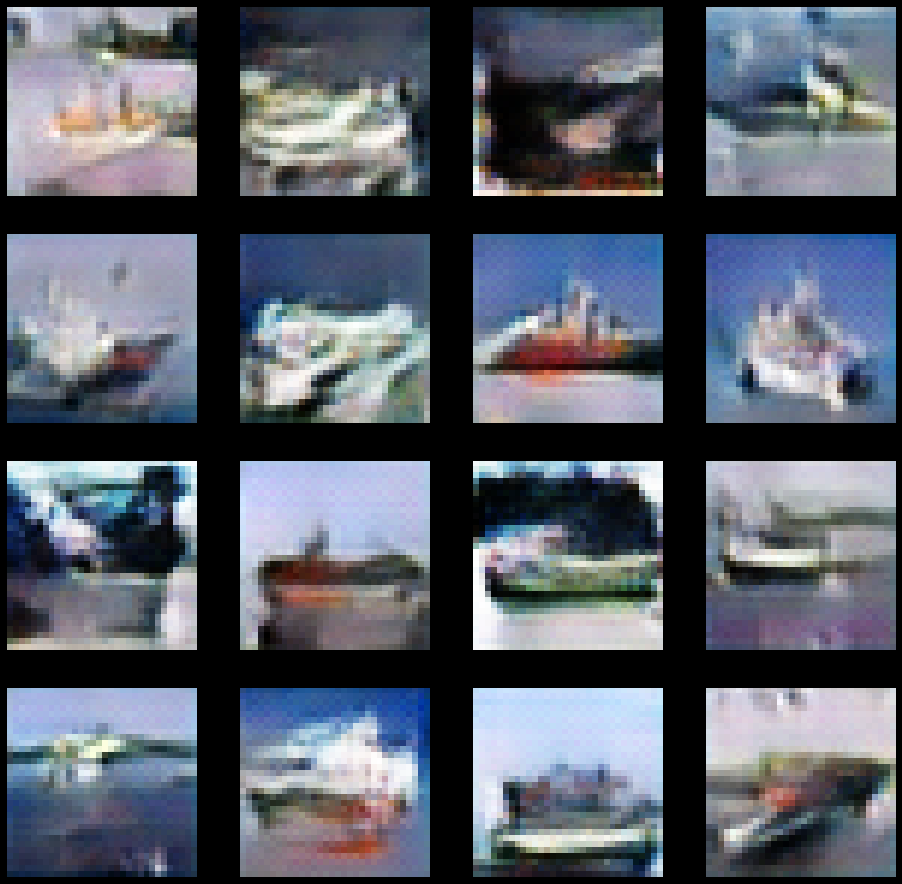

None
157/157 [==============================] - 1s 9ms/step - d_loss: 0.6906 - g_loss: 0.6608


In [19]:
g = gan.GAN(g=gen31, d=disc31, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [20]:
name = 'Model_4-Same-Tanh-nBatch-sDrop'
model4 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen32, disc32 = model.build(model4)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen32, disc=disc32,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_8 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

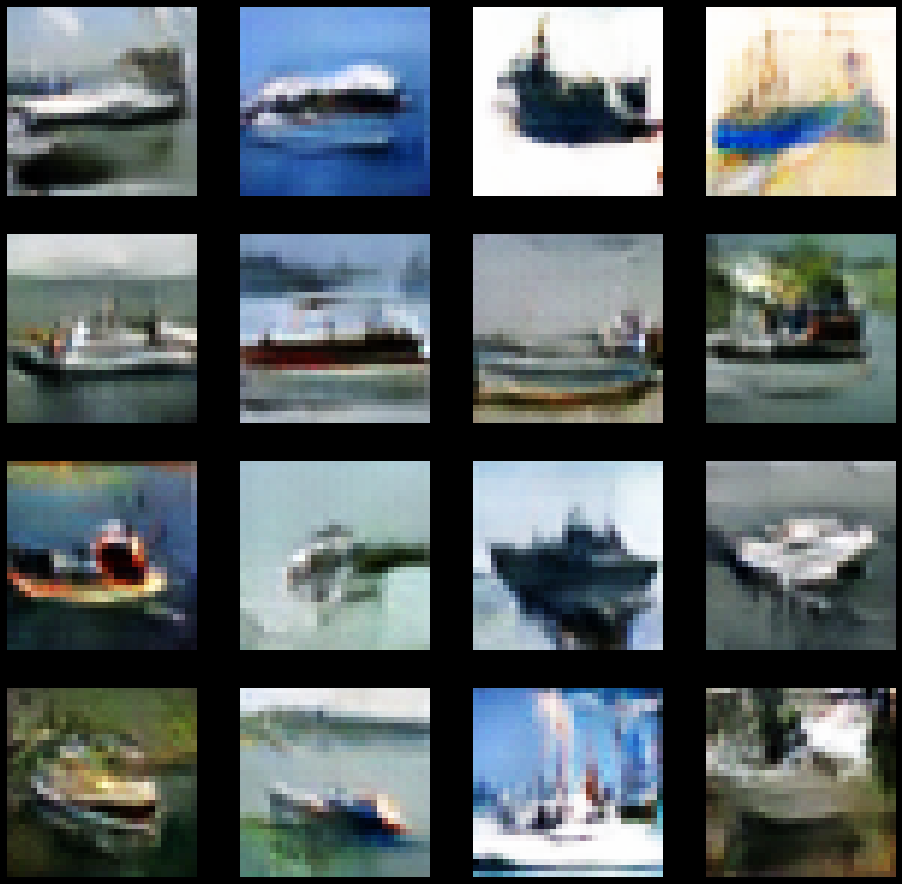

None
157/157 [==============================] - 3s 21ms/step - d_loss: 0.6714 - g_loss: 0.7355


In [21]:
g = gan.GAN(g=gen32, d=disc32, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [22]:
name = 'Model_5-Same-Tanh-nBatch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen33, disc33 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen33, disc=disc33,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_18 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_9 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

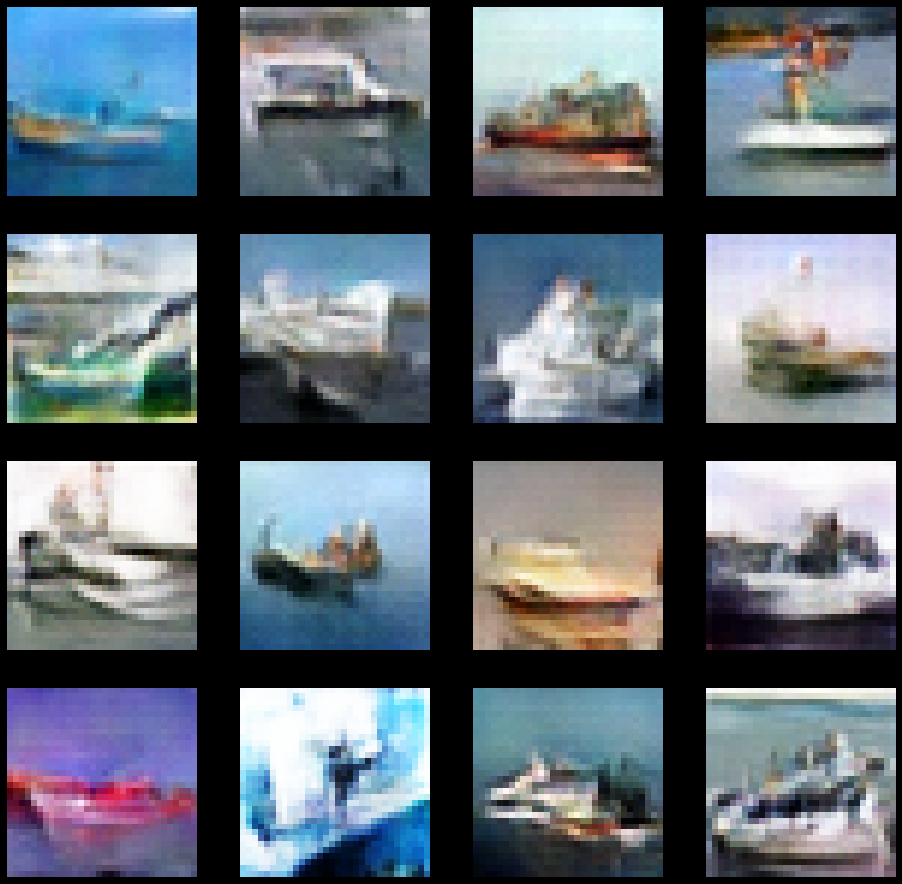

None
157/157 [==============================] - 5s 32ms/step - d_loss: 0.6419 - g_loss: 0.8358
Epoch 185/500
 19/157 [==>...........................] - ETA: 4s - d_loss: 0.6490 - g_loss: 0.8723

In [ ]:
g = gan.GAN(g=gen33, d=disc33, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [4]:
name = 'Model_10-Same-Tanh-nBatch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen34, disc34 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen34, disc=disc34,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 8192)              827392    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                         

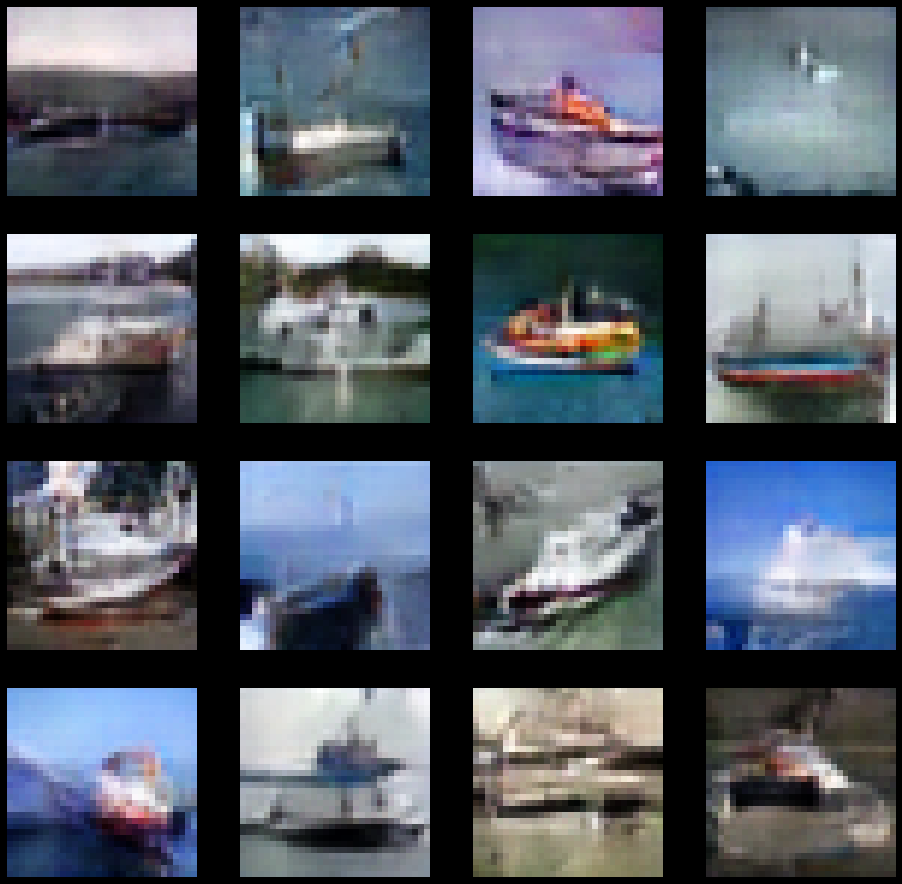

None
157/157 [==============================] - 5s 32ms/step - d_loss: 0.3924 - g_loss: 1.5513


In [5]:
g = gan.GAN(g=gen34, d=disc34, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [6]:
name = 'Model_11-Same-Tanh-Batch-sDrop'
model1 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen35, disc35 = model.build(model1)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen35, disc=disc35,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 2048)              206848    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 2048)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 32)       16416     
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 32)        0         
                                                         

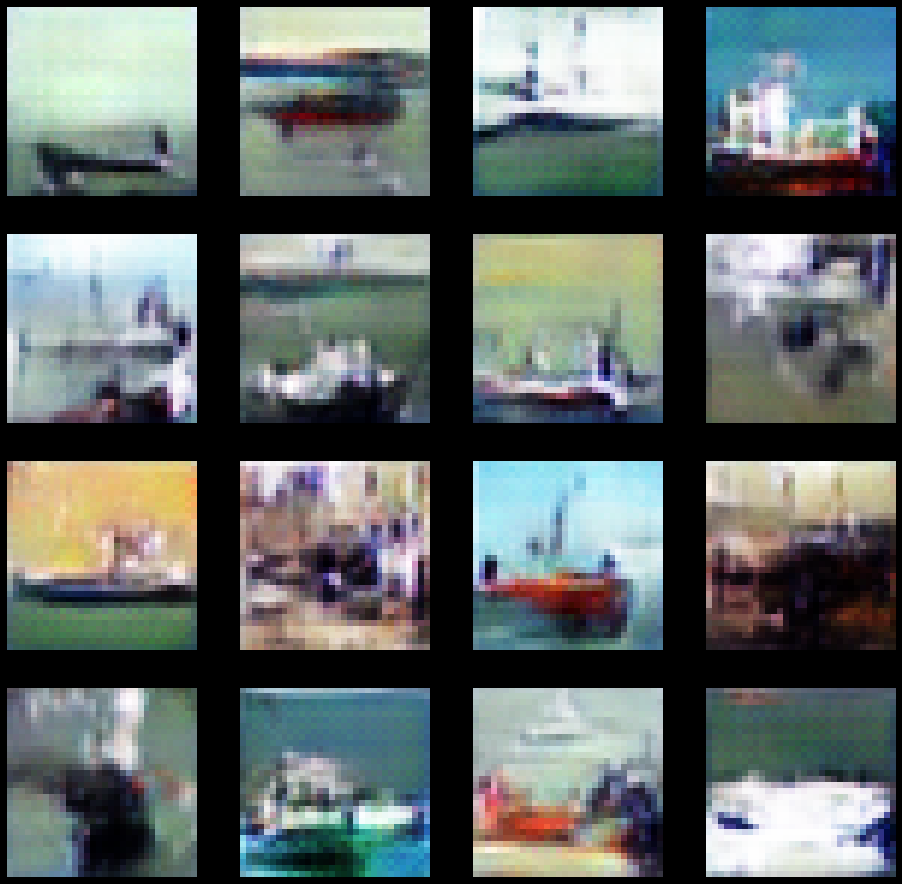

None
157/157 [==============================] - 1s 9ms/step - d_loss: 0.6906 - g_loss: 0.6614


In [7]:
g = gan.GAN(g=gen35, d=disc35, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [8]:
name = 'Model_12-Same-Tanh-Batch-sDrop'
model2 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen36, disc36 = model.build(model2)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen36, disc=disc36,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 64)       65600     
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

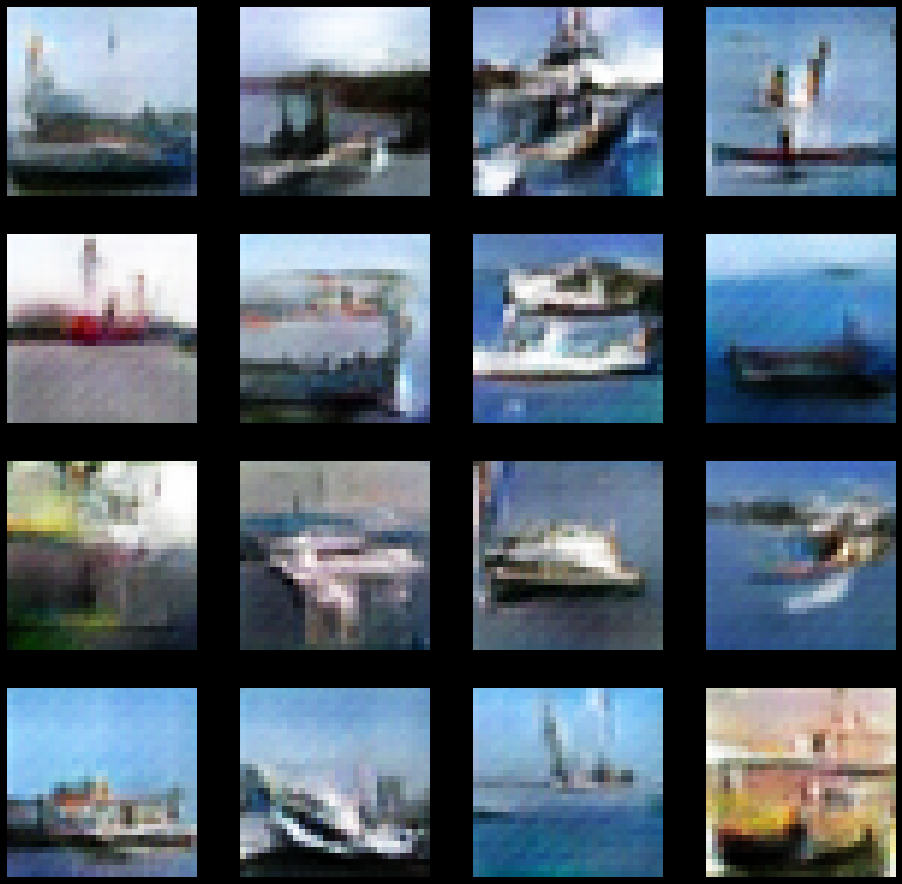

None
157/157 [==============================] - 2s 12ms/step - d_loss: 0.6877 - g_loss: 0.6656


In [9]:
g = gan.GAN(g=gen36, d=disc36, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [10]:
name = 'Model_15-Same-Tanh-Batch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen37, disc37 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen37, disc=disc37,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

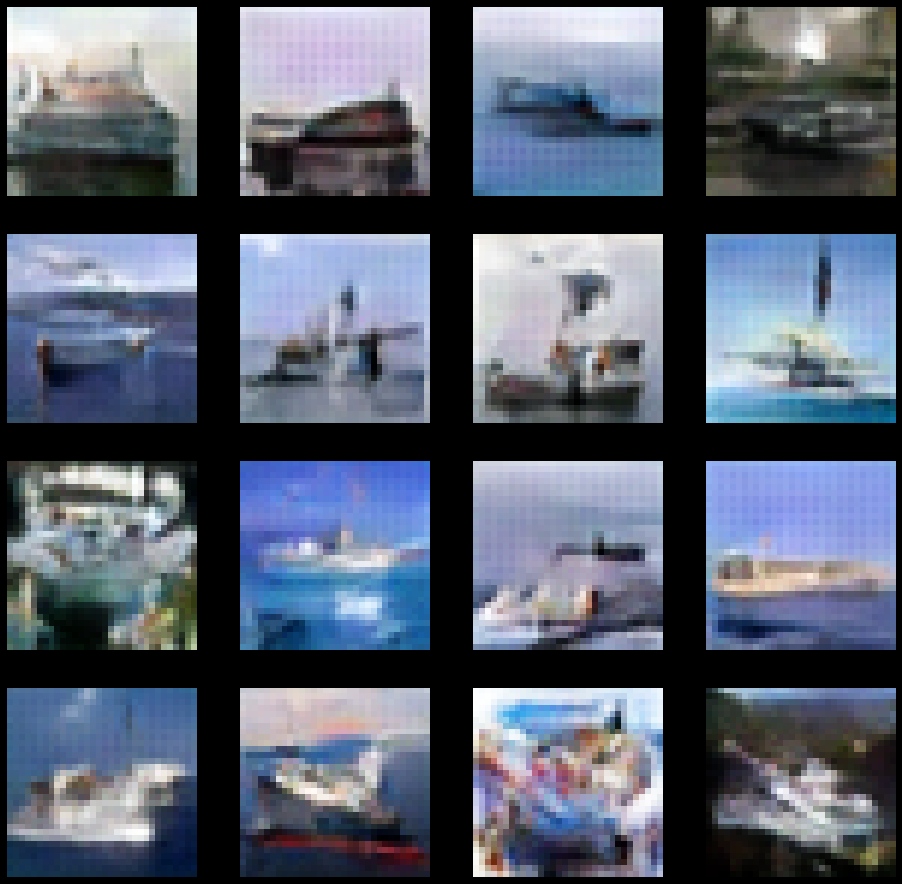

None
157/157 [==============================] - 5s 33ms/step - d_loss: 0.3446 - g_loss: 1.8321


In [11]:
g = gan.GAN(g=gen37, d=disc37, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [12]:
name = 'Model_17-Same-Tanh-Batch-mDrop'
model7 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen38, disc38 = model.build(model7)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen38, disc=disc38,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 16, 16, 64)       65600     
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

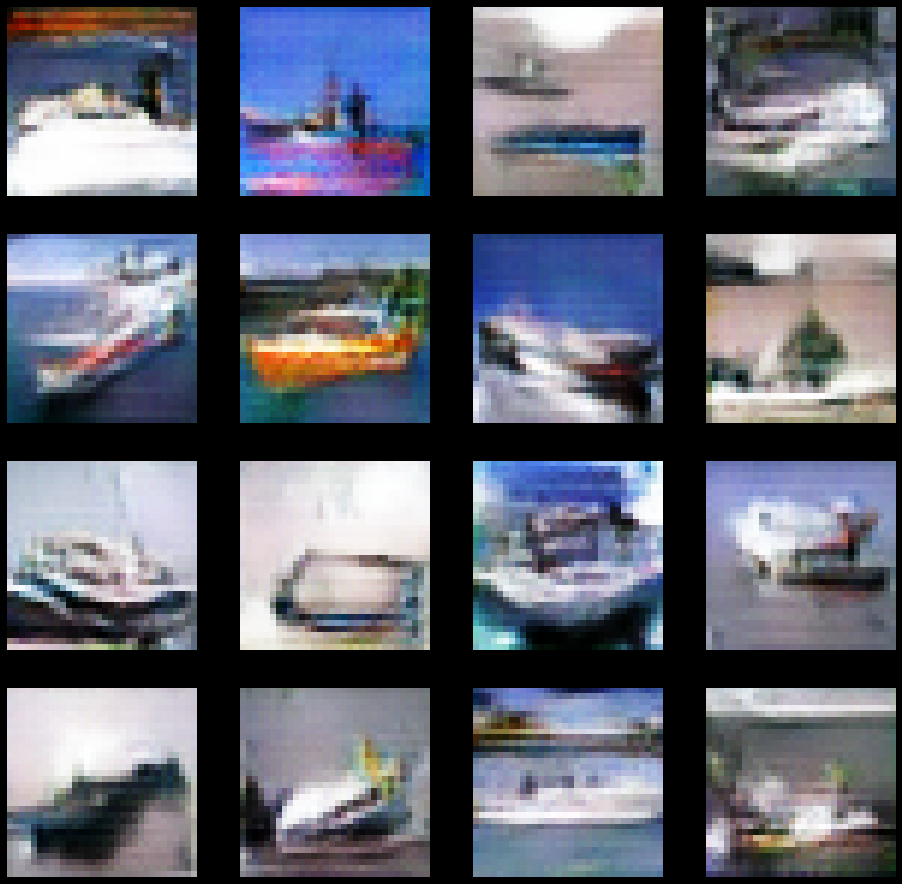

None
157/157 [==============================] - 2s 11ms/step - d_loss: 0.6887 - g_loss: 0.6610


In [13]:
g = gan.GAN(g=gen38, d=disc38, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [14]:
name = 'Model_20-Same-Tanh-Batch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen39, disc39 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen39, disc=disc39,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

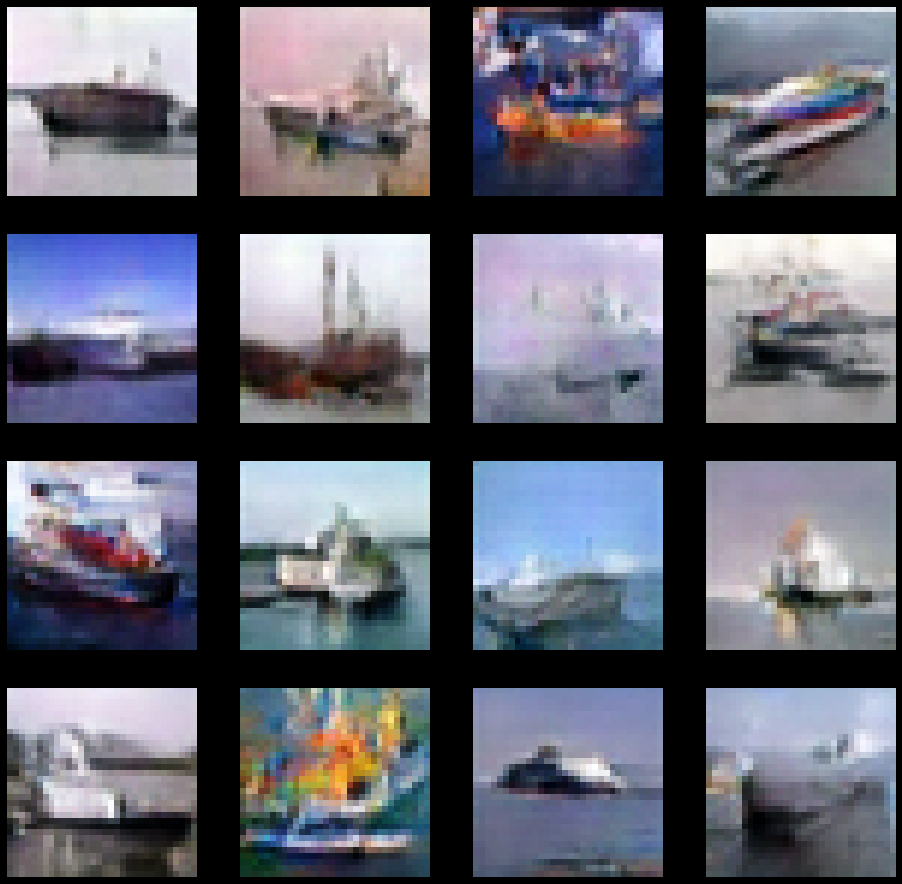

None
157/157 [==============================] - 5s 32ms/step - d_loss: 0.3380 - g_loss: 1.8984


In [15]:
g = gan.GAN(g=gen39, d=disc39, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])